# Predicting Stock Market With Machine Learning

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dataset = dict()

for root, dirs, files in os.walk("Datasets"):
    for file in files:
        if file.endswith(".csv"):
            dataname = file.split('.')[0]
            dataset[dataname] = pd.read_csv(os.path.join(root, file))

feature1 = ['Open', 'High', 'Low', 'Close', 'Volume']
feature2 = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'RSI']

def draw_plot(actual, predicted, name):
    plt.figure(figsize=(10, 5))
    plt.plot(actual.values, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title(f"Actual vs Predicted Closing Prices ({name})")
    plt.show()

dataset['AppleStock_Year1'].head()

Date       Close        High         Low        Open    Volume  \
0  2024-01-22  192.480438  193.909972  190.862283  190.902001  60133900   
1  2024-01-23  193.761063  194.326926  192.420886  193.602237  42355600   
2  2024-01-24  193.085999  194.952336  192.927158  193.999308  53631300   
3  2024-01-25  192.758408  194.843147  191.706116  193.800777  54822100   
4  2024-01-26  191.021118  193.344103  190.544612  192.857675  44594000   

       Target       SMA_5      SMA_10       EMA_5      EMA_10        RSI  
0  193.761063  186.710696  185.520407  188.315401  186.374689  66.056890  
1  193.085999  189.003897  186.475415  190.130622  187.717666  67.679825  
2  192.758408  191.350708  187.404611  191.115747  188.693726  69.508961  
3  191.021118  192.450656  188.196809  191.663301  189.432759  75.267971  
4  190.336151  192.621405  188.874843  191.449240  189.721552  72.231035

# Linear Regression Model

Using a linear regression model should be a good start to see how well it performs in predicting the next day stock. Though it sounds possible that this model might not work that well and be quite inaccurate because of how chaotic the stock market moves.

## Training with 1 year data

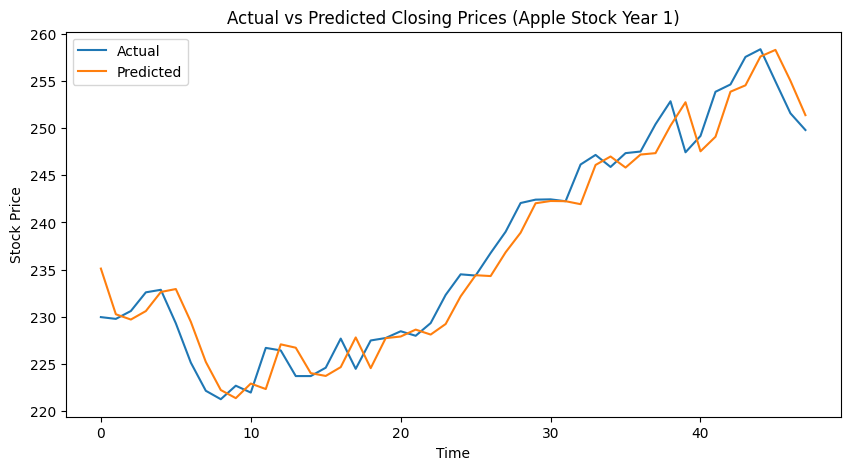

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Using the first year of Apple stock data
features = dataset['AppleStock_Year1'][feature2]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_lr, y_train_lr)

# Predict on test data
linear_regression_predictions = linear_regression_model.predict(x_test_lr)

draw_plot(y_test_lr, linear_regression_predictions, "Apple Stock Year 1")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_lr, linear_regression_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lr, linear_regression_predictions)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

ValueError: ('Lengths must match to compare', (48,), (47,))

The final result after training the model using the apple stock for 1 year is a lot more surprising than I thought. The model predict quite accurately although there are still some miss.

## Training with 5 year data

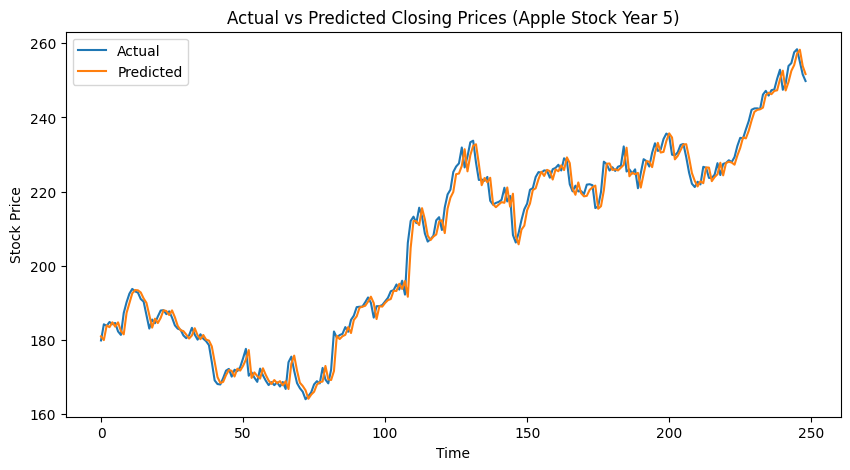

In [43]:
# Using the five year of Apple stock data
features = dataset['AppleStock_Year5'][feature2]
stock_target = dataset['AppleStock_Year5']['Target']

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

linear_regression_model.fit(x_train_lr, y_train_lr)

# Predict on test data
linear_regression_predictions = linear_regression_model.predict(x_test_lr)

draw_plot(y_test_lr, linear_regression_predictions, "Apple Stock Year 5")

In [44]:
mse = mean_squared_error(y_test_lr, linear_regression_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lr, linear_regression_predictions)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Linear Regression Model Performance:
Mean Squared Error = 8.56
Root Mean Squared Error = 2.93
R2 Score = 0.99


The final result after training the model using the apple stock for 5 year show some quite impressive result. The prediction is quite accurate although still not perfect.

## Testing with other datasets

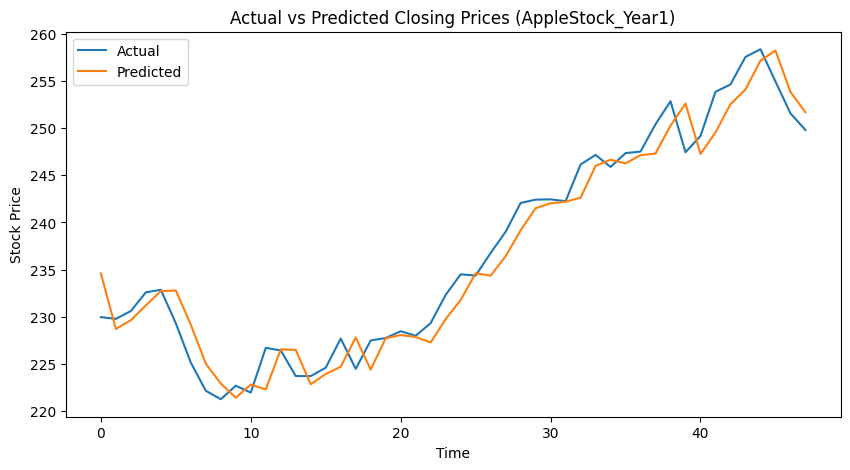

Linear Regression Model Performance (AppleStock_Year1):
Mean Squared Error = 5.92
Root Mean Squared Error = 2.43
R2 Score = 0.95


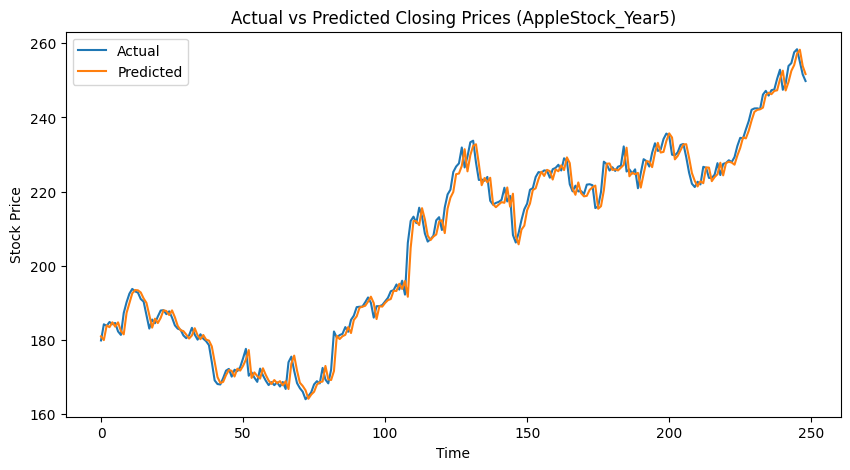

Linear Regression Model Performance (AppleStock_Year5):
Mean Squared Error = 8.56
Root Mean Squared Error = 2.93
R2 Score = 0.99


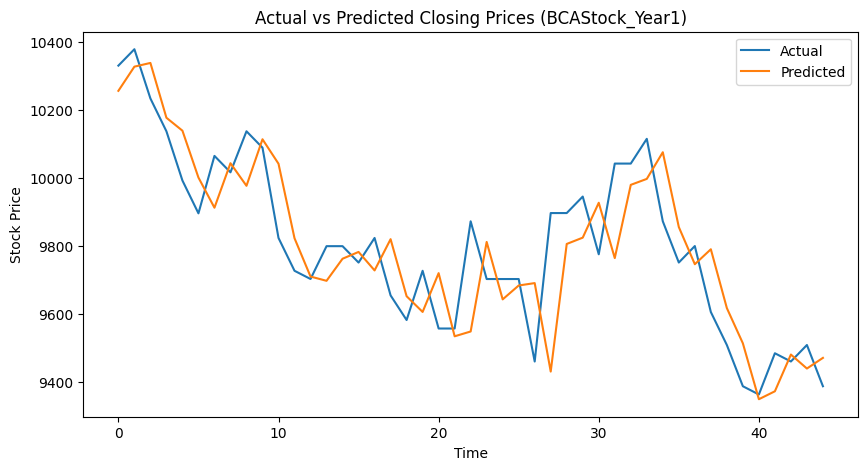

Linear Regression Model Performance (BCAStock_Year1):
Mean Squared Error = 20666.72
Root Mean Squared Error = 143.76
R2 Score = 0.67


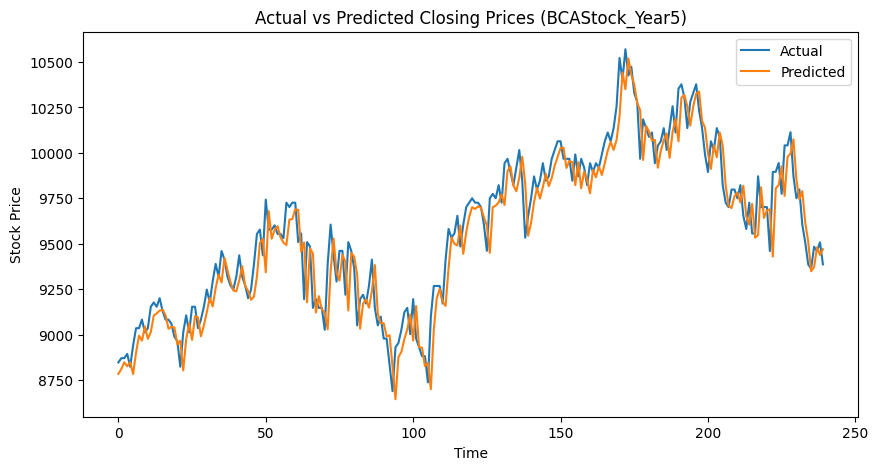

Linear Regression Model Performance (BCAStock_Year5):
Mean Squared Error = 18851.53
Root Mean Squared Error = 137.30
R2 Score = 0.90


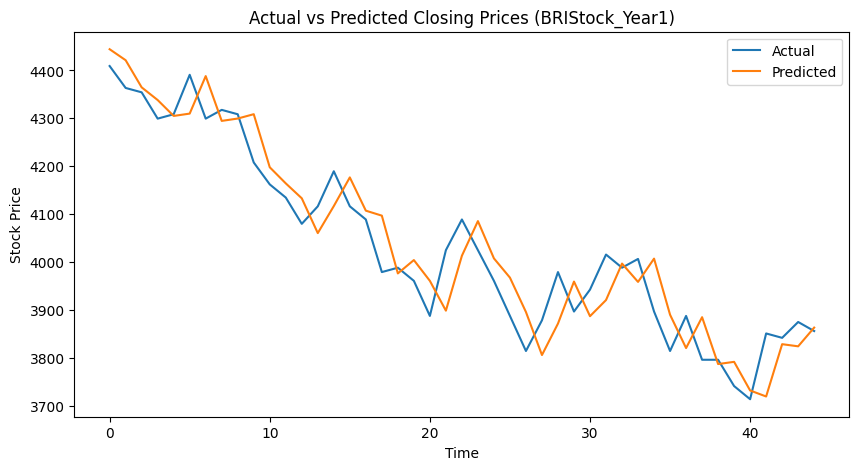

Linear Regression Model Performance (BRIStock_Year1):
Mean Squared Error = 4423.98
Root Mean Squared Error = 66.51
R2 Score = 0.88


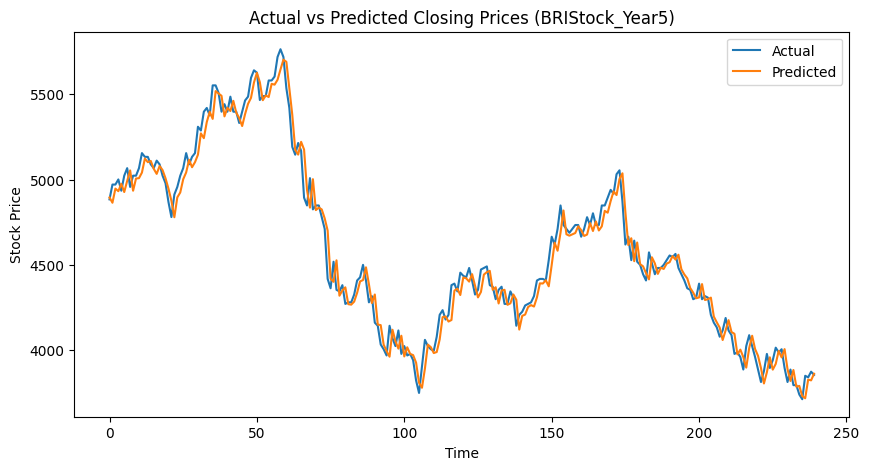

Linear Regression Model Performance (BRIStock_Year5):
Mean Squared Error = 6969.58
Root Mean Squared Error = 83.48
R2 Score = 0.97


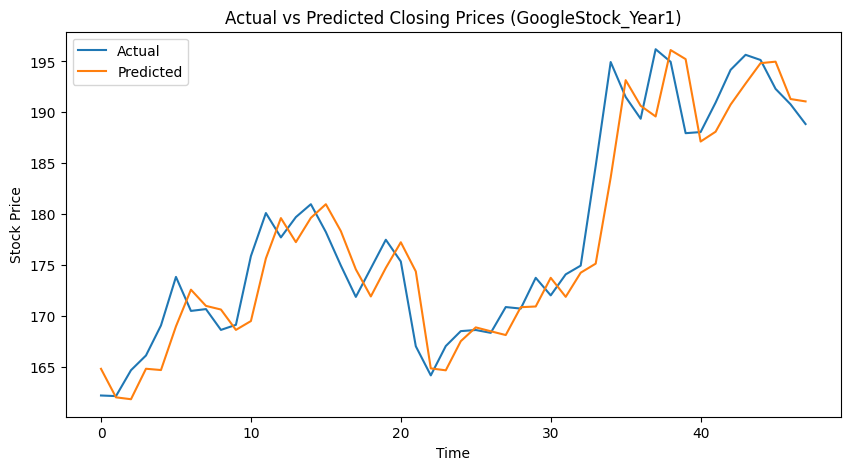

Linear Regression Model Performance (GoogleStock_Year1):
Mean Squared Error = 13.20
Root Mean Squared Error = 3.63
R2 Score = 0.88


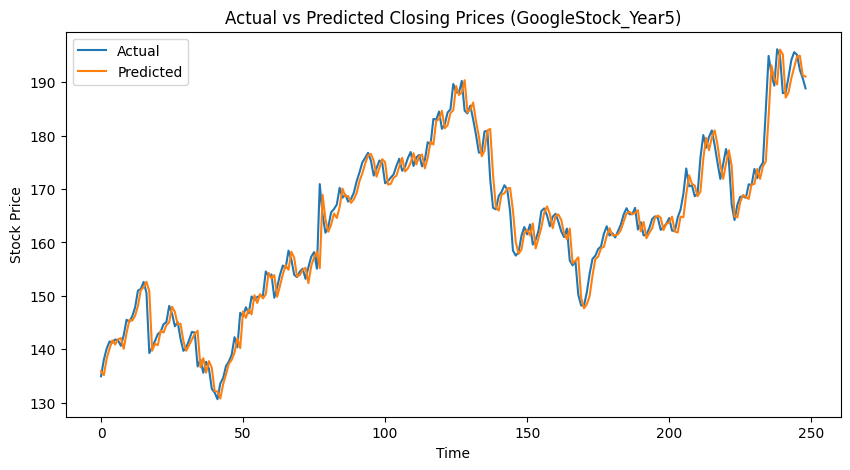

Linear Regression Model Performance (GoogleStock_Year5):
Mean Squared Error = 8.52
Root Mean Squared Error = 2.92
R2 Score = 0.96


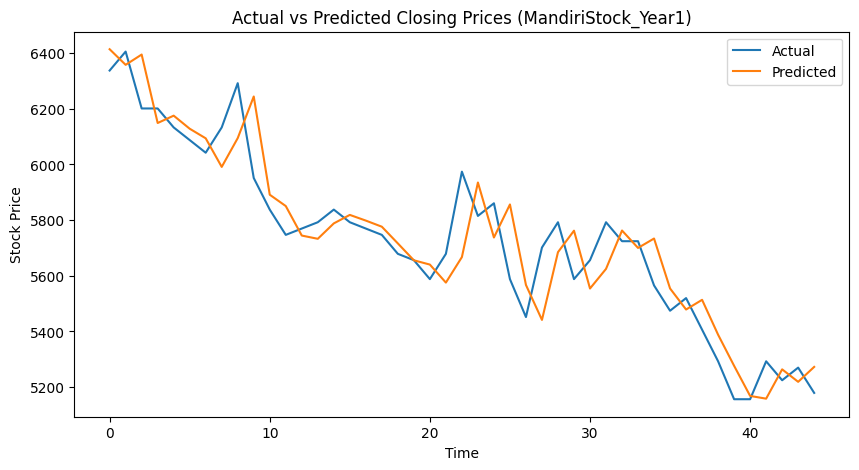

Linear Regression Model Performance (MandiriStock_Year1):
Mean Squared Error = 15523.14
Root Mean Squared Error = 124.59
R2 Score = 0.85


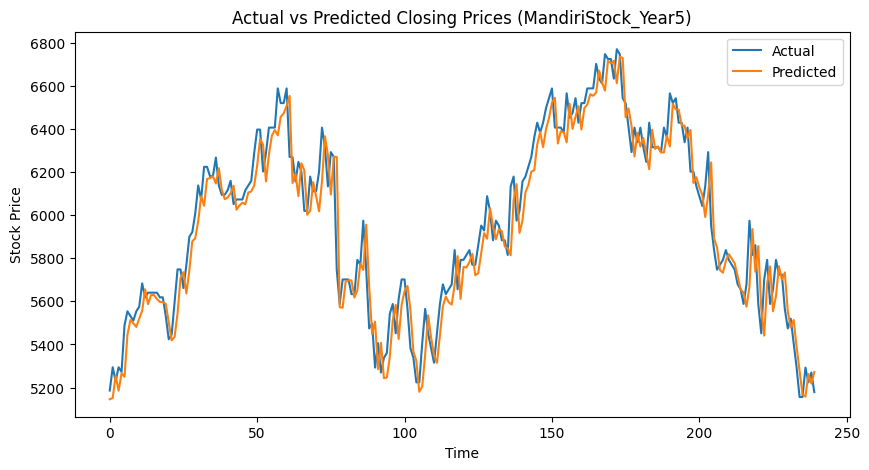

Linear Regression Model Performance (MandiriStock_Year5):
Mean Squared Error = 13975.17
Root Mean Squared Error = 118.22
R2 Score = 0.92


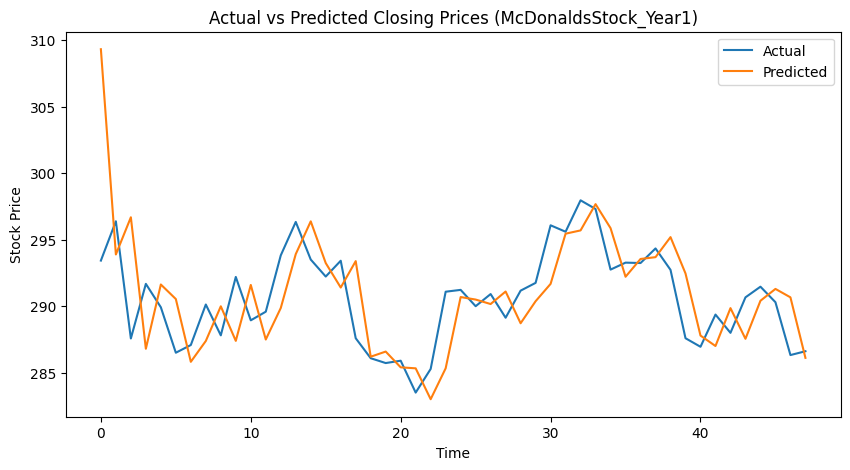

Linear Regression Model Performance (McDonaldsStock_Year1):
Mean Squared Error = 13.84
Root Mean Squared Error = 3.72
R2 Score = -0.16


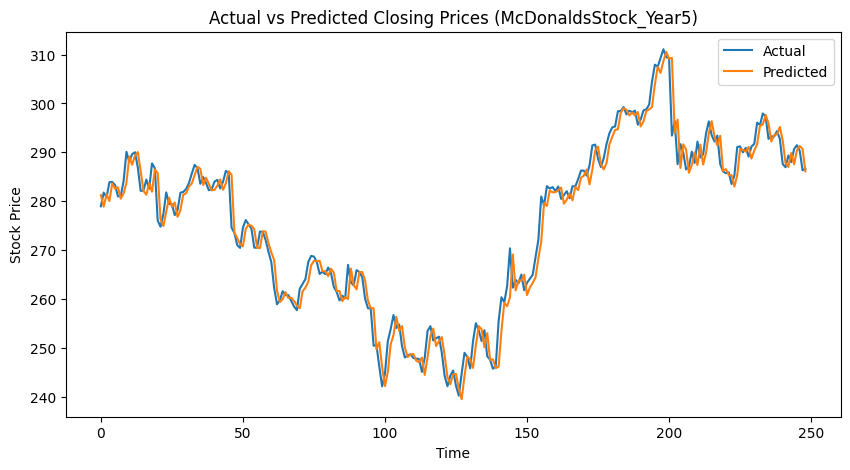

Linear Regression Model Performance (McDonaldsStock_Year5):
Mean Squared Error = 10.05
Root Mean Squared Error = 3.17
R2 Score = 0.97


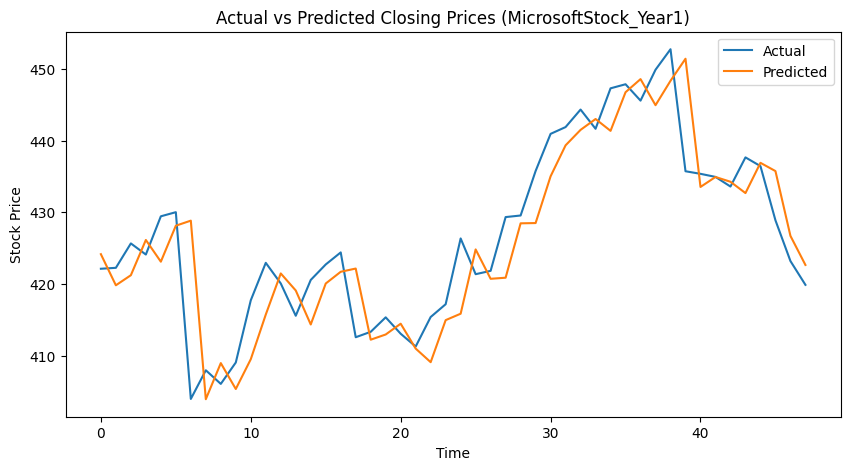

Linear Regression Model Performance (MicrosoftStock_Year1):
Mean Squared Error = 37.40
Root Mean Squared Error = 6.12
R2 Score = 0.75


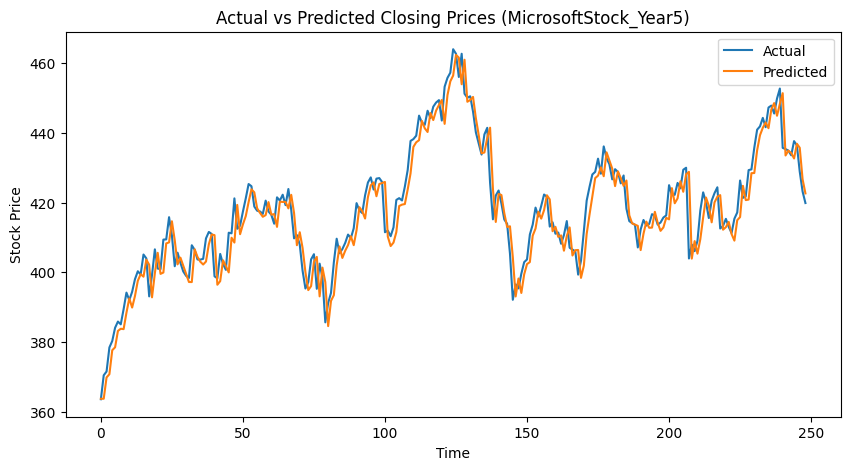

Linear Regression Model Performance (MicrosoftStock_Year5):
Mean Squared Error = 29.35
Root Mean Squared Error = 5.42
R2 Score = 0.90


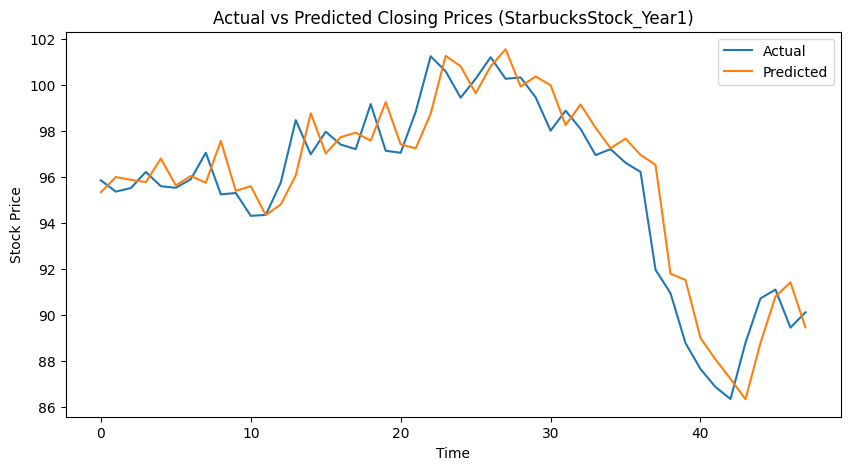

Linear Regression Model Performance (StarbucksStock_Year1):
Mean Squared Error = 2.07
Root Mean Squared Error = 1.44
R2 Score = 0.86


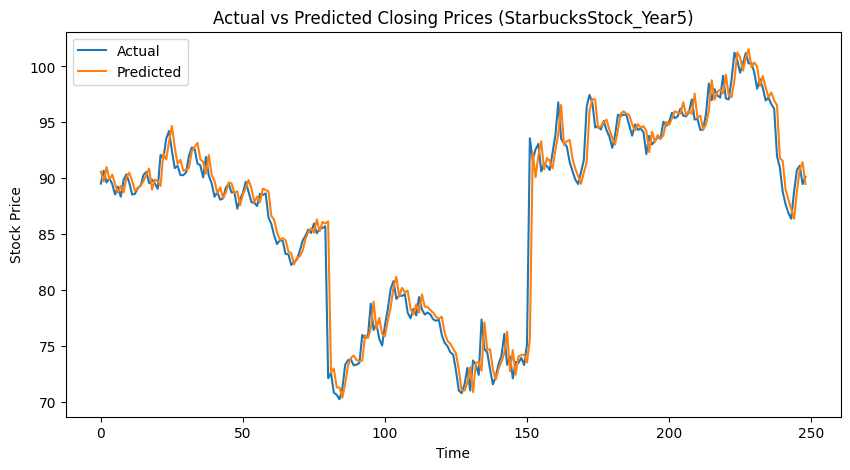

Linear Regression Model Performance (StarbucksStock_Year5):
Mean Squared Error = 3.74
Root Mean Squared Error = 1.93
R2 Score = 0.95


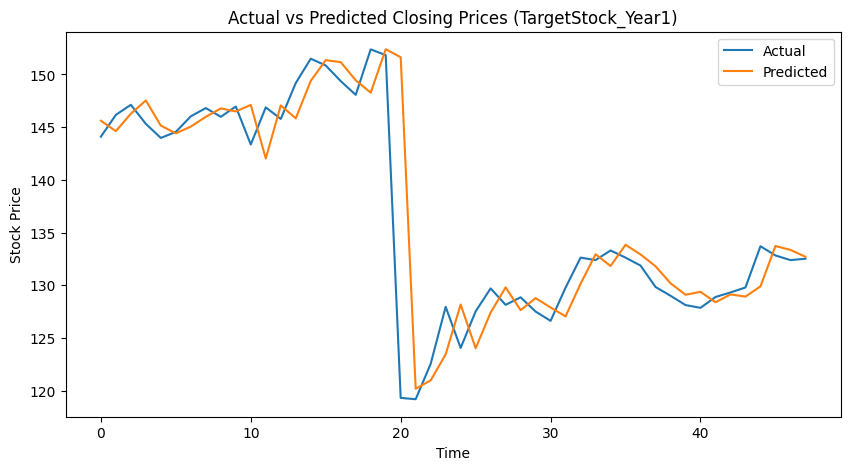

Linear Regression Model Performance (TargetStock_Year1):
Mean Squared Error = 25.95
Root Mean Squared Error = 5.09
R2 Score = 0.72


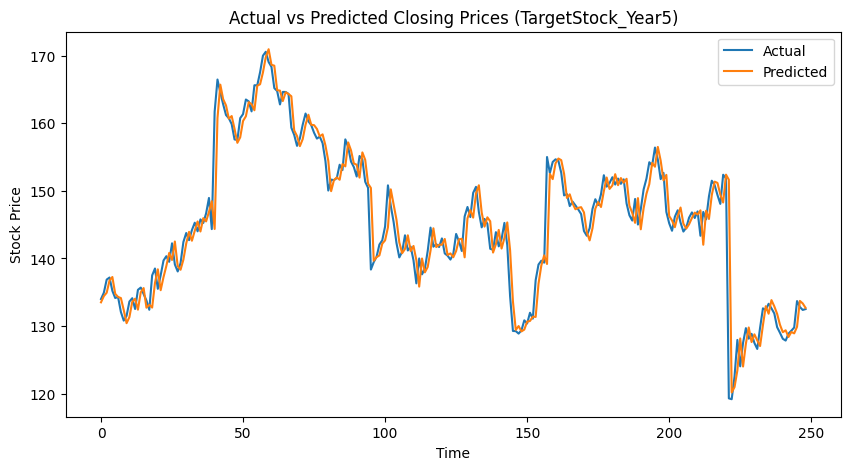

Linear Regression Model Performance (TargetStock_Year5):
Mean Squared Error = 11.64
Root Mean Squared Error = 3.41
R2 Score = 0.90

Final Error Summary:
Average Mean Squared Error = 4476.69
Average Root Mean Squared Error = 39.78
Average R2 Score = 0.83


In [45]:
n = len(dataset)
mse_sum = 0
rmse_sum = 0
r2_sum = 0

for name, data in dataset.items():
    features = dataset[name][feature2]
    stock_target = dataset[name]['Target']

    x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

    linear_regression_predictions = linear_regression_model.predict(x_test_lr)

    draw_plot(y_test_lr, linear_regression_predictions, name)

    mse = mean_squared_error(y_test_lr, linear_regression_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_lr, linear_regression_predictions)

    mse_sum += mse
    rmse_sum += rmse
    r2_sum += r2

    print(f"Linear Regression Model Performance ({name}):")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Root Mean Squared Error = {rmse:.2f}")
    print(f"R2 Score = {r2:.2f}")

print()
print("Final Error Summary:")
print(f"Average Mean Squared Error = {mse_sum / n:.2f}")
print(f"Average Root Mean Squared Error = {rmse_sum / n:.2f}")
print(f"Average R2 Score = {r2_sum / n:.2f}")

## Conclusion

Seeing the final result on how the model did with the rest of the dataset, it is quite interesting. Though the model seems to be sometimes doing well with other stock than others, it is possible that it can't exactly handle different stocks cause of the difference of how the market moves in each company. However the model did much more better than anticipated, that is possibly due to the fact that we are using quantitative data which linear regression is kinda build out of.

# Random Forest Model

The Random Forest model will be next and will be quite interesting, seeing that the random forest model is generally just a bunch of decision trees and will predict the result base of those decision. This model is technically "supposedly" better than linear regression so we'll see how well it is.

## Training with 1 year data

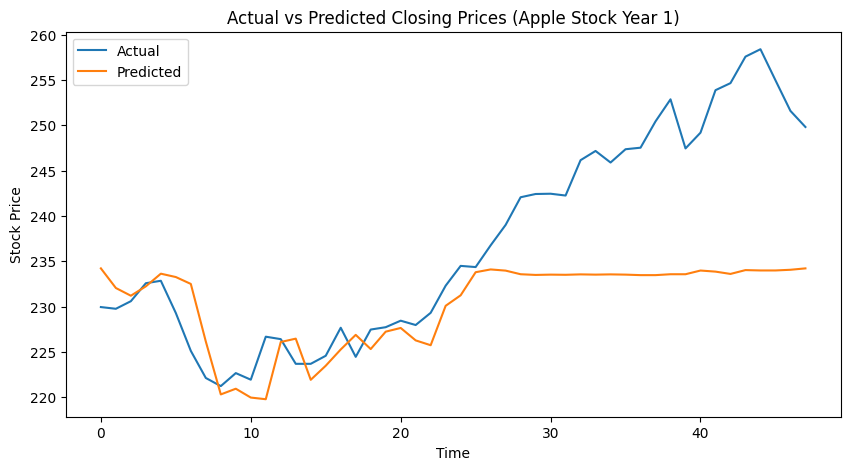

In [46]:
from sklearn.ensemble import RandomForestRegressor

features = dataset['AppleStock_Year1'][feature2]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train_rf, y_train_rf)

random_forest_predictions = random_forest_model.predict(x_test_rf)

draw_plot(y_test_rf, random_forest_predictions, "Apple Stock Year 1")

In [47]:
mse = mean_squared_error(y_test_rf, random_forest_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rf, random_forest_predictions)

print("Random Forest Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Random Forest Model Performance:
Mean Squared Error = 115.05
Root Mean Squared Error = 10.73
R2 Score = 0.10


Initial results looks bad, the model seems to be doing something at the start, but going towards the end it just creates a flat line. I am wondering if it is cause it is that bad, or the training data is too small.

## Training with 5 year data

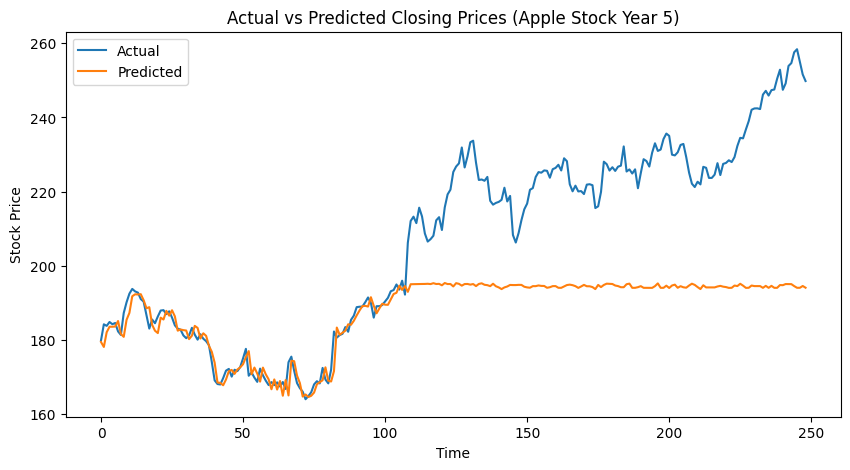

In [48]:
features = dataset['AppleStock_Year5'][feature2]
stock_target = dataset['AppleStock_Year5']['Target']

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train_rf, y_train_rf)

random_forest_predictions = random_forest_model.predict(x_test_rf)

draw_plot(y_test_rf, random_forest_predictions, "Apple Stock Year 5")

In [49]:
mse = mean_squared_error(y_test_rf, random_forest_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rf, random_forest_predictions)

print("Random Forest Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Random Forest Model Performance:
Mean Squared Error = 675.37
Root Mean Squared Error = 25.99
R2 Score = -0.03


The model seems to be performing similar if not worst after being trained with a 5 year data. It depicts the line at first doing pretty well, but then midway towards the end it just creates this stagger line that fails to predict the stock.

## Testing with other datasets

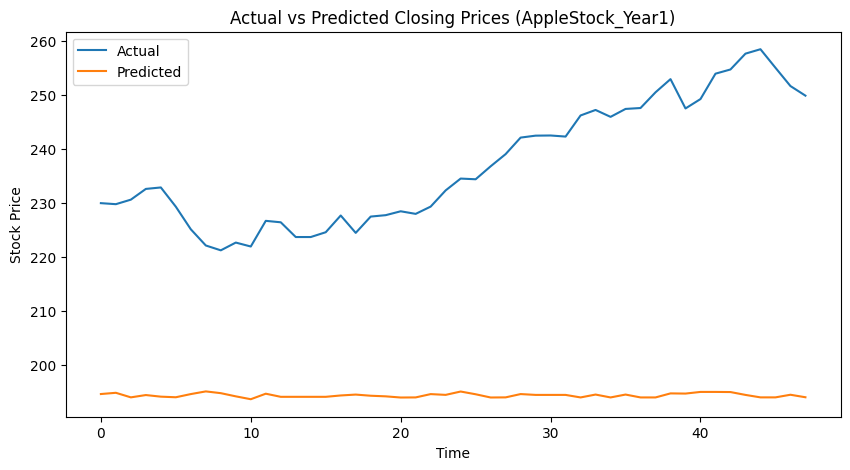

Random Forest Model Performance (AppleStock_Year1):
Mean Squared Error = 1941.76
Root Mean Squared Error = 44.07
R2 Score = -14.16


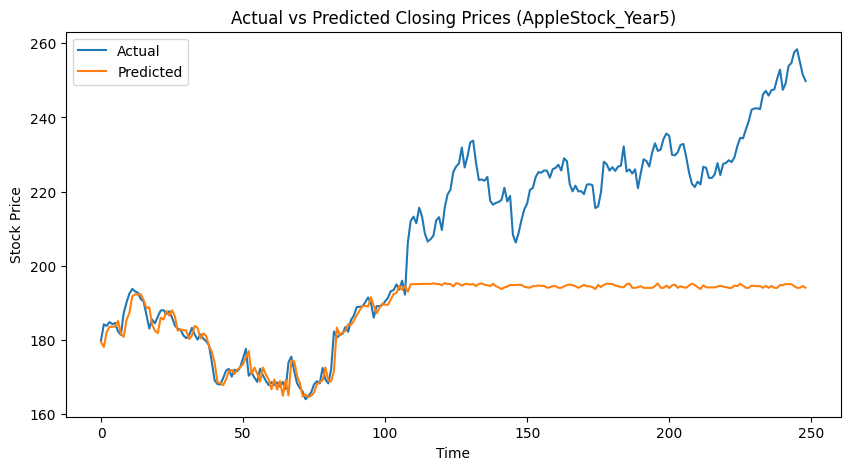

Random Forest Model Performance (AppleStock_Year5):
Mean Squared Error = 675.37
Root Mean Squared Error = 25.99
R2 Score = -0.03


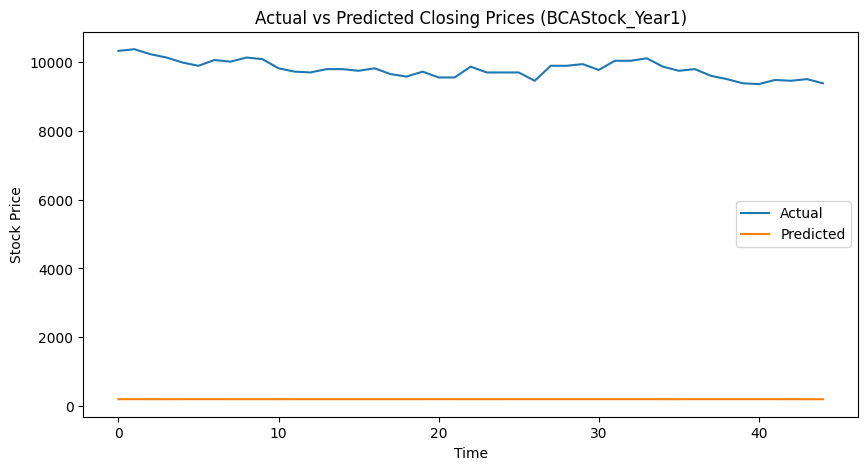

Random Forest Model Performance (BCAStock_Year1):
Mean Squared Error = 92326554.89
Root Mean Squared Error = 9608.67
R2 Score = -1453.72


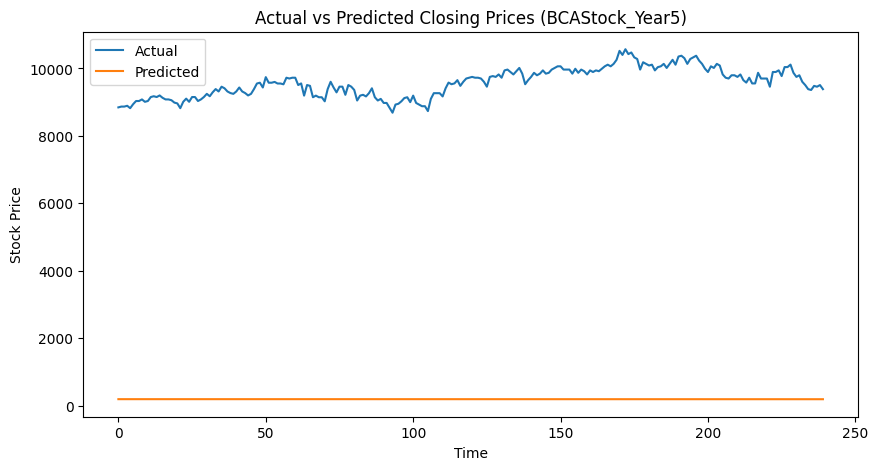

Random Forest Model Performance (BCAStock_Year5):
Mean Squared Error = 88309948.85
Root Mean Squared Error = 9397.34
R2 Score = -490.14


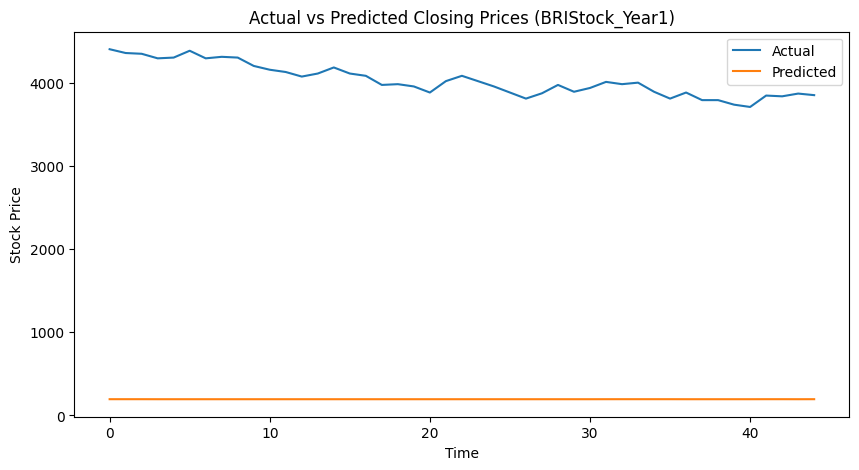

Random Forest Model Performance (BRIStock_Year1):
Mean Squared Error = 14778355.46
Root Mean Squared Error = 3844.26
R2 Score = -405.74


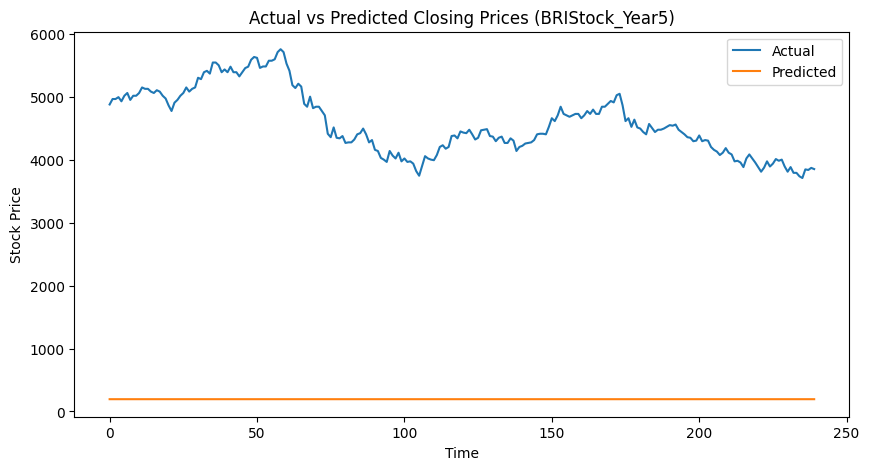

Random Forest Model Performance (BRIStock_Year5):
Mean Squared Error = 19559637.84
Root Mean Squared Error = 4422.63
R2 Score = -73.92


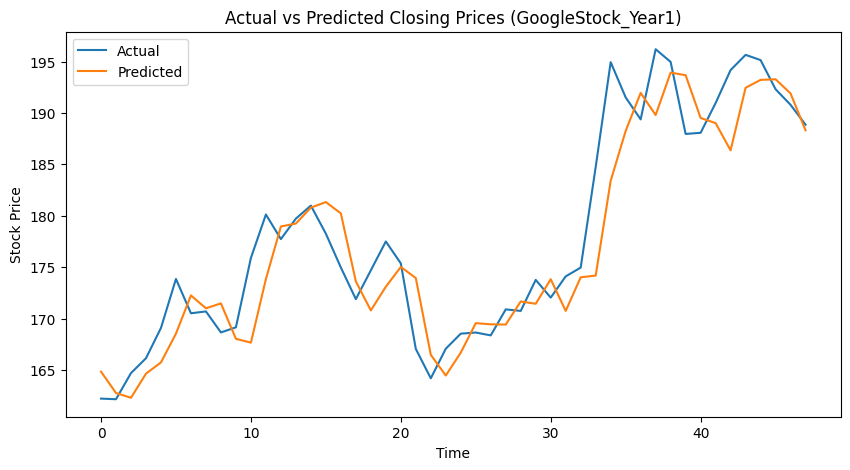

Random Forest Model Performance (GoogleStock_Year1):
Mean Squared Error = 15.83
Root Mean Squared Error = 3.98
R2 Score = 0.85


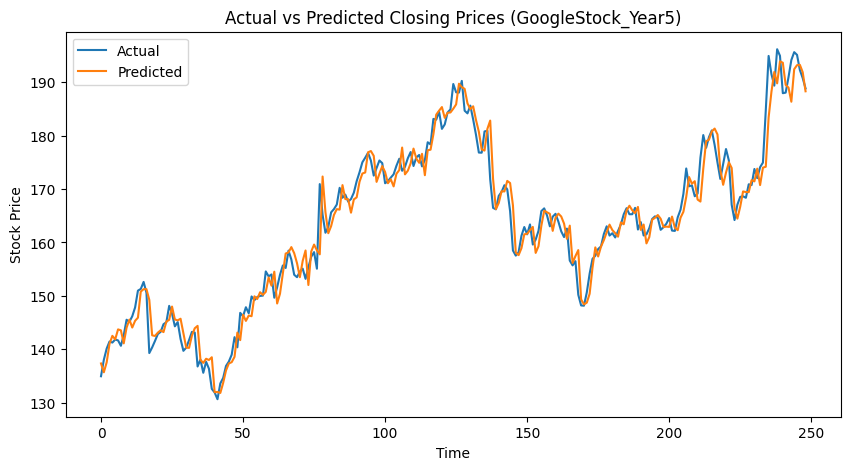

Random Forest Model Performance (GoogleStock_Year5):
Mean Squared Error = 9.57
Root Mean Squared Error = 3.09
R2 Score = 0.96


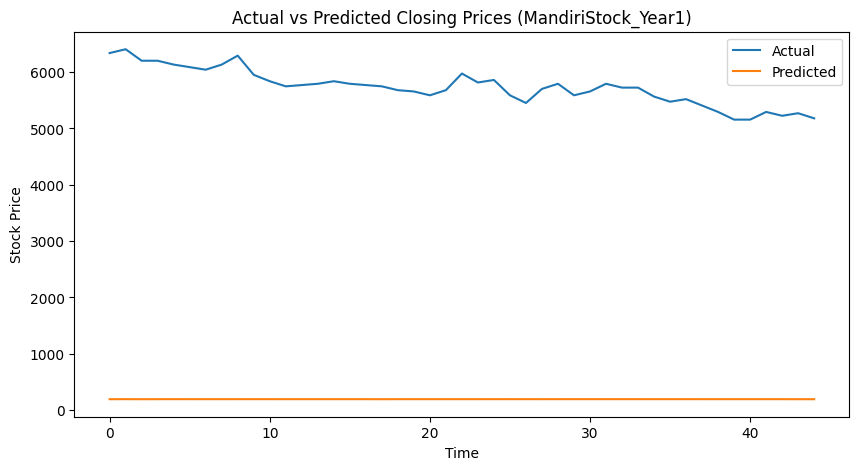

Random Forest Model Performance (MandiriStock_Year1):
Mean Squared Error = 30745830.73
Root Mean Squared Error = 5544.89
R2 Score = -305.14


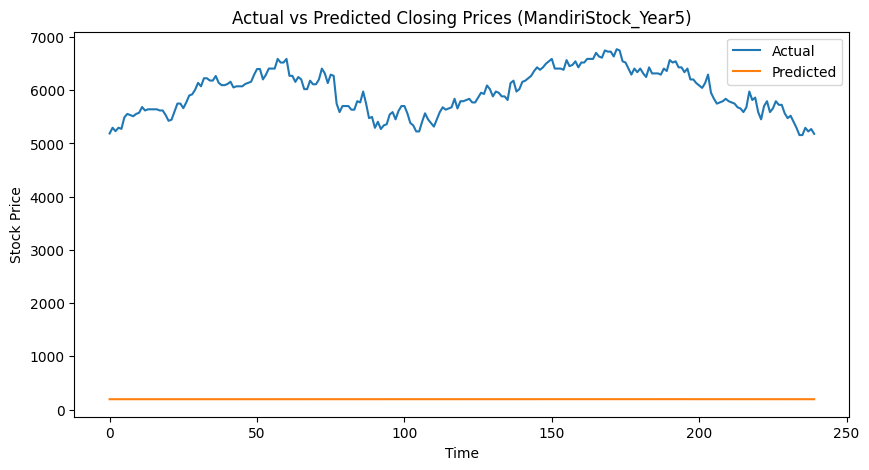

Random Forest Model Performance (MandiriStock_Year5):
Mean Squared Error = 33439835.80
Root Mean Squared Error = 5782.72
R2 Score = -196.84


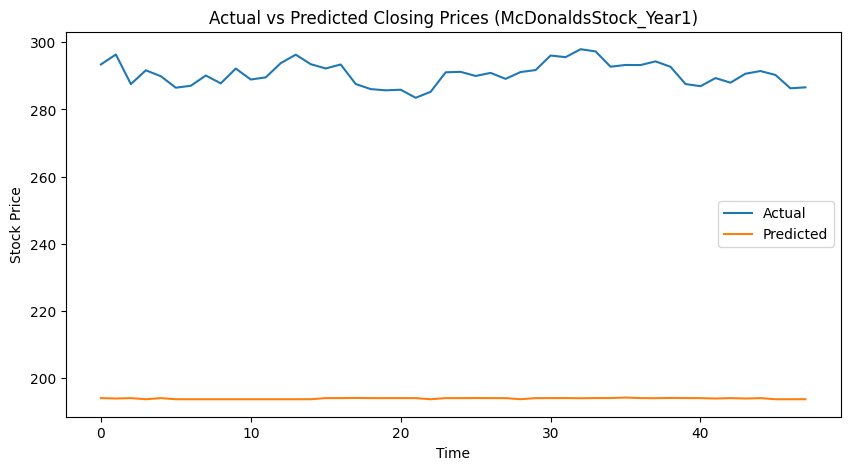

Random Forest Model Performance (McDonaldsStock_Year1):
Mean Squared Error = 9360.08
Root Mean Squared Error = 96.75
R2 Score = -781.32


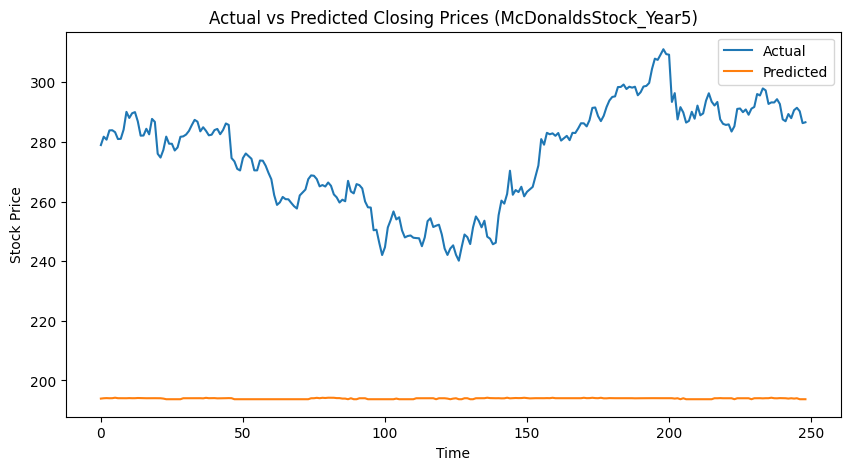

Random Forest Model Performance (McDonaldsStock_Year5):
Mean Squared Error = 6952.49
Root Mean Squared Error = 83.38
R2 Score = -22.81


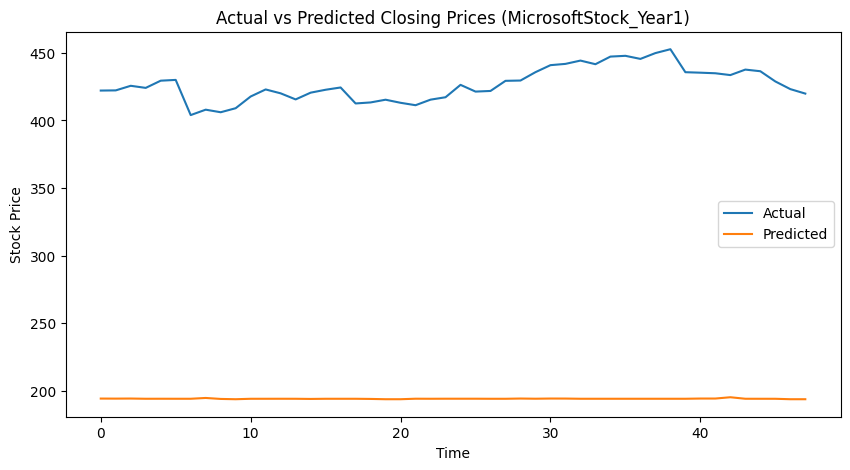

Random Forest Model Performance (MicrosoftStock_Year1):
Mean Squared Error = 54293.03
Root Mean Squared Error = 233.01
R2 Score = -358.94


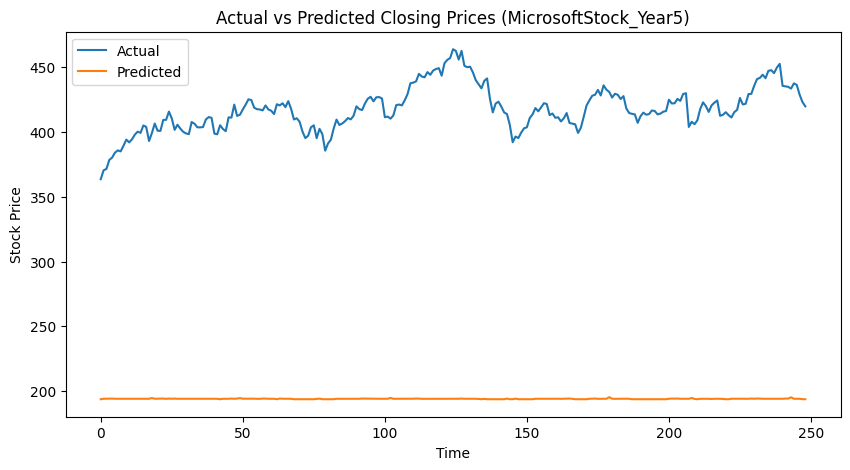

Random Forest Model Performance (MicrosoftStock_Year5):
Mean Squared Error = 50357.91
Root Mean Squared Error = 224.41
R2 Score = -168.19


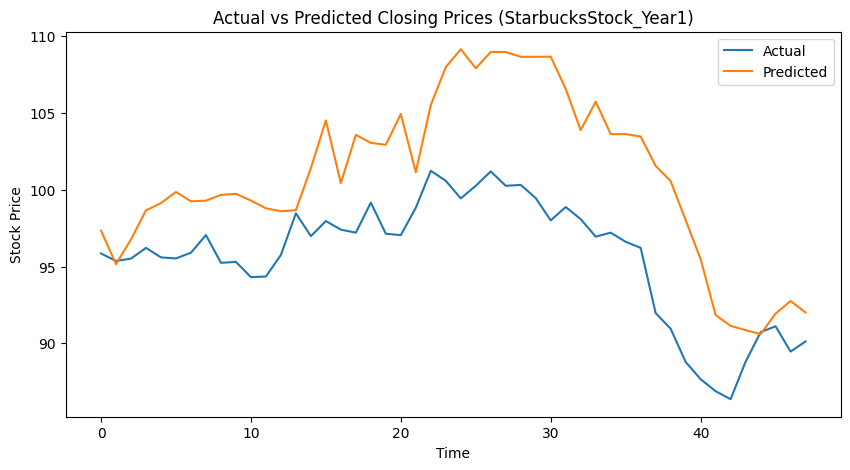

Random Forest Model Performance (StarbucksStock_Year1):
Mean Squared Error = 35.80
Root Mean Squared Error = 5.98
R2 Score = -1.35


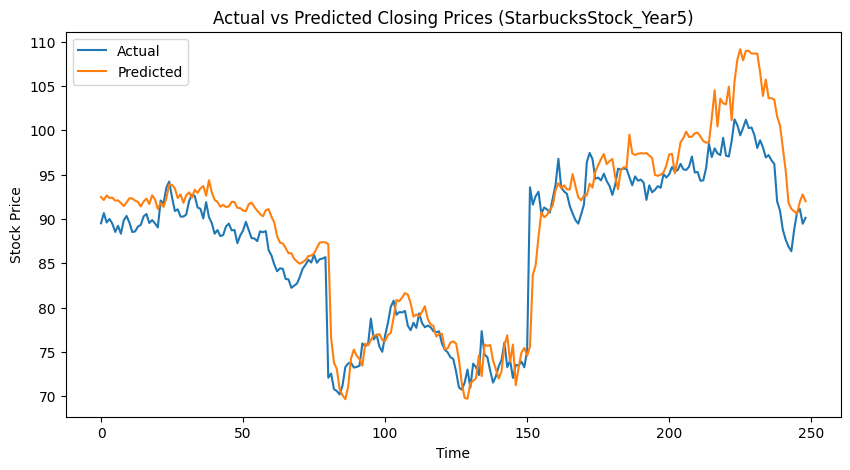

Random Forest Model Performance (StarbucksStock_Year5):
Mean Squared Error = 14.18
Root Mean Squared Error = 3.77
R2 Score = 0.80


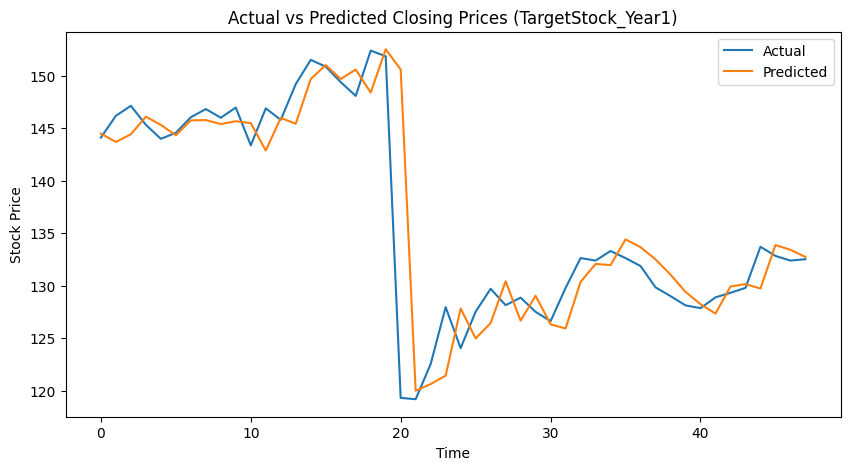

Random Forest Model Performance (TargetStock_Year1):
Mean Squared Error = 25.20
Root Mean Squared Error = 5.02
R2 Score = 0.73


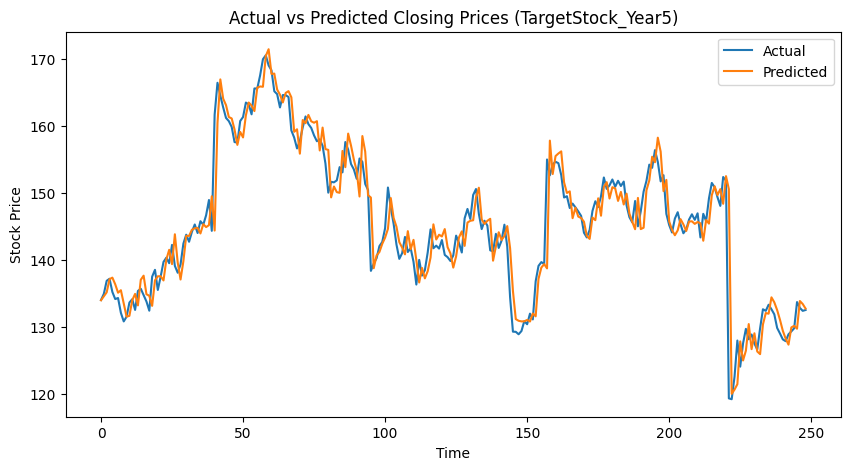

Random Forest Model Performance (TargetStock_Year5):
Mean Squared Error = 12.68
Root Mean Squared Error = 3.56
R2 Score = 0.89

Final Error Summary:
Average Mean Squared Error = 15515769.86
Average Root Mean Squared Error = 2185.19
Average R2 Score = -237.11


In [50]:
n = len(dataset)
mse_sum = 0
rmse_sum = 0
r2_sum = 0

for name, data in dataset.items():
    features = dataset[name][feature2]
    stock_target = dataset[name]['Target']

    x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

    random_forest_predictions = random_forest_model.predict(x_test_rf)

    draw_plot(y_test_rf, random_forest_predictions, name)

    mse = mean_squared_error(y_test_rf, random_forest_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_rf, random_forest_predictions)

    mse_sum += mse
    rmse_sum += rmse
    r2_sum += r2

    print(f"Random Forest Model Performance ({name}):")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Root Mean Squared Error = {rmse:.2f}")
    print(f"R2 Score = {r2:.2f}")

print()
print("Final Error Summary:")
print(f"Average Mean Squared Error = {mse_sum / n:.2f}")
print(f"Average Root Mean Squared Error = {rmse_sum / n:.2f}")
print(f"Average R2 Score = {r2_sum / n:.2f}")

## Conclusion

Random Forest isn't fit to be used as an actual and functional model. It's unpredictable behaviour towards certain stock is worrying. In one company it seems to be doing not bad, but in another it is doing very terribly.

# XGBoost Model

The XGBoost Model from research is practically an advanced version of Random Forest. Although the random forest model didn't work that well, couldn't hurt to test this model to see if it will improve on random forest or not.

## Training with 1 year data

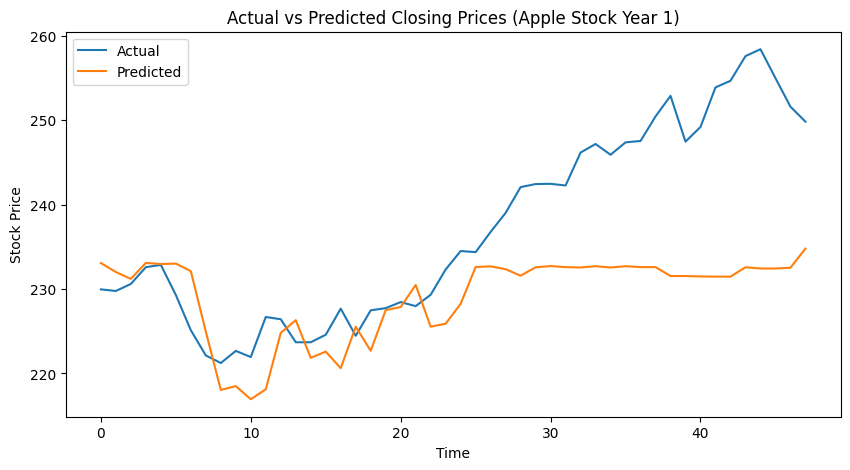

In [51]:
import xgboost as xgb

features = dataset['AppleStock_Year1'][feature2]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgboost_model.fit(x_train_xgb, y_train_xgb)

xgboost_predictions = xgboost_model.predict(x_test_xgb)

draw_plot(y_test_xgb, xgboost_predictions, "Apple Stock Year 1")

In [52]:
mse = mean_squared_error(y_test_xgb, xgboost_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_xgb, xgboost_predictions)

print("XGBoost Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

XGBoost Model Performance:
Mean Squared Error = 138.64
Root Mean Squared Error = 11.77
R2 Score = -0.08


After some inspection it seems to be doing pretty similar with the random forest model. Dissapointing.

## Training with 5 year data

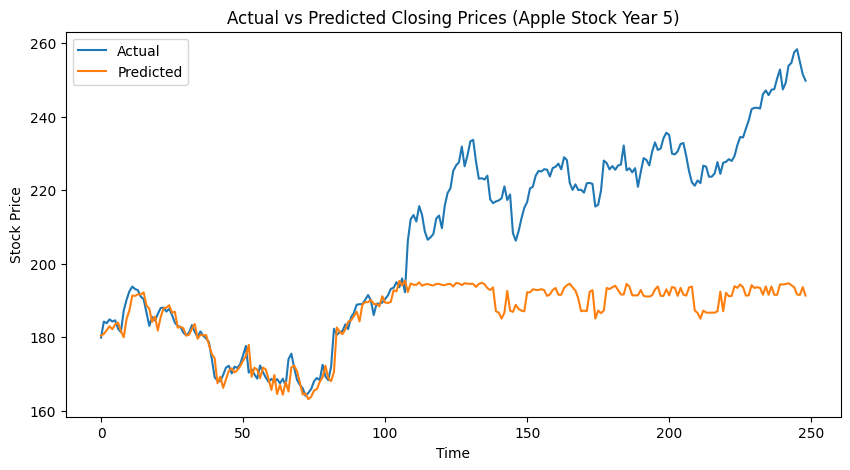

In [53]:
features = dataset['AppleStock_Year5'][feature2]
stock_target = dataset['AppleStock_Year5']['Target']

x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgboost_model.fit(x_train_xgb, y_train_xgb)

xgboost_predictions = xgboost_model.predict(x_test_xgb)

draw_plot(y_test_xgb, xgboost_predictions, "Apple Stock Year 5")

In [54]:
mse = mean_squared_error(y_test_xgb, xgboost_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_xgb, xgboost_predictions)

print("XGBoost Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

XGBoost Model Performance:
Mean Squared Error = 774.00
Root Mean Squared Error = 27.82
R2 Score = -0.18


Although it no longer goes in a somewhat straight line, it still fails to predict the mid - end stock price.

## Testing with other datasets

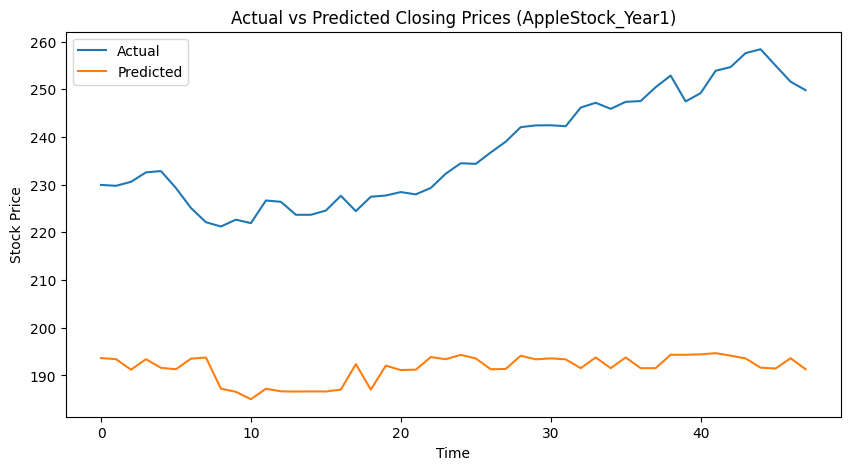

XGBoost Model Performance (AppleStock_Year1):
Mean Squared Error = 2167.51
Root Mean Squared Error = 46.56
R2 Score = -15.92


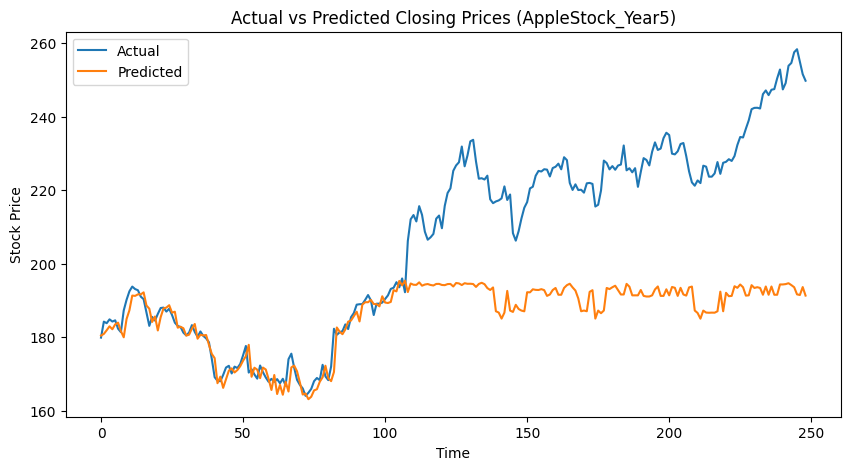

XGBoost Model Performance (AppleStock_Year5):
Mean Squared Error = 774.00
Root Mean Squared Error = 27.82
R2 Score = -0.18


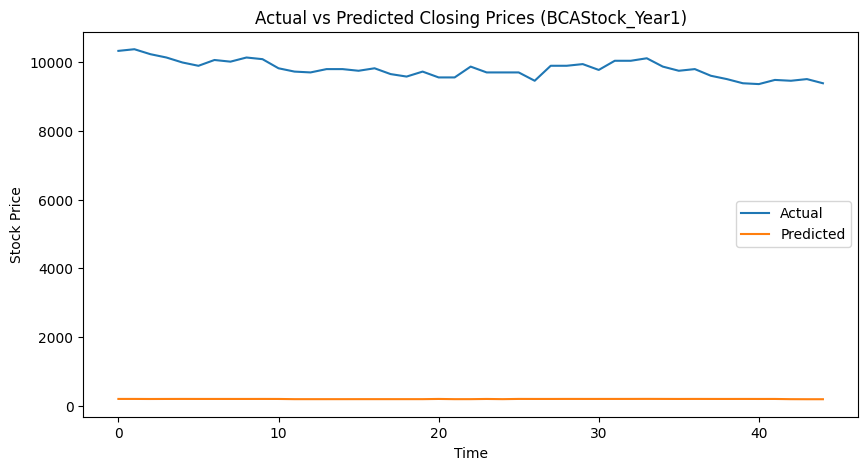

XGBoost Model Performance (BCAStock_Year1):
Mean Squared Error = 92399570.72
Root Mean Squared Error = 9612.47
R2 Score = -1454.87


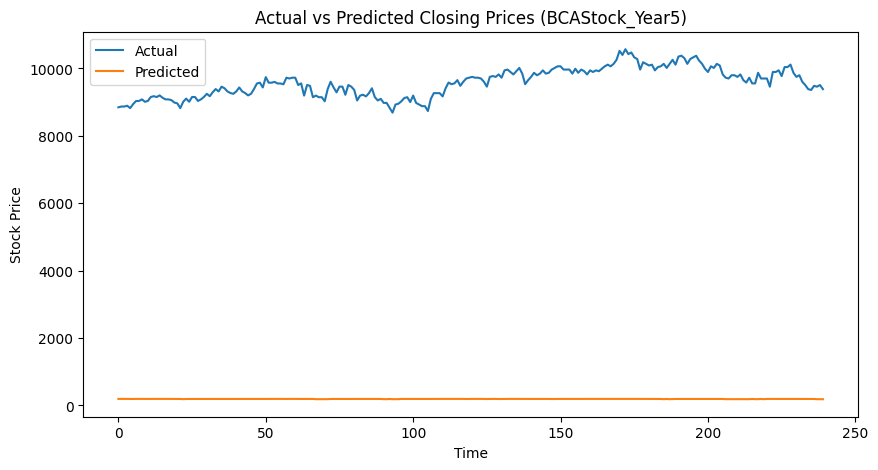

XGBoost Model Performance (BCAStock_Year5):
Mean Squared Error = 88353212.37
Root Mean Squared Error = 9399.64
R2 Score = -490.38


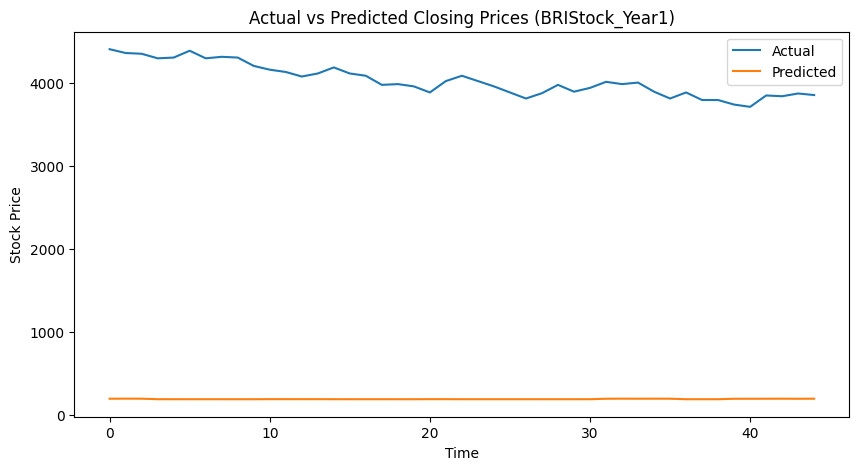

XGBoost Model Performance (BRIStock_Year1):
Mean Squared Error = 14824337.78
Root Mean Squared Error = 3850.24
R2 Score = -407.01


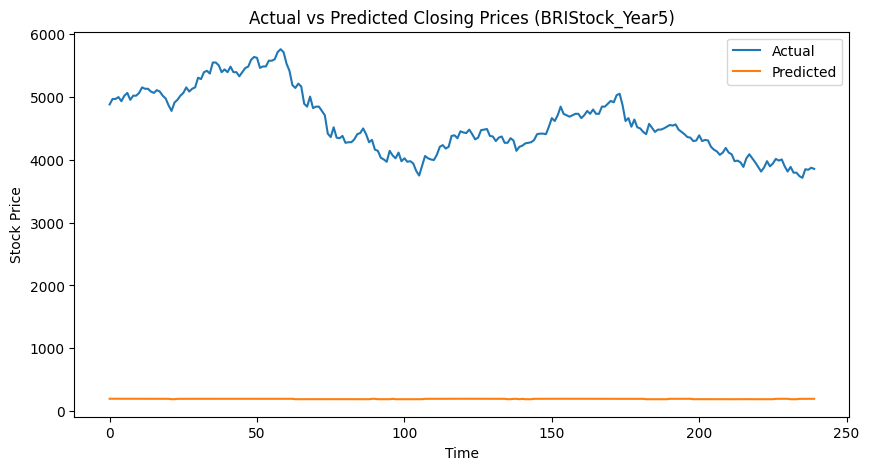

XGBoost Model Performance (BRIStock_Year5):
Mean Squared Error = 19591071.09
Root Mean Squared Error = 4426.18
R2 Score = -74.04


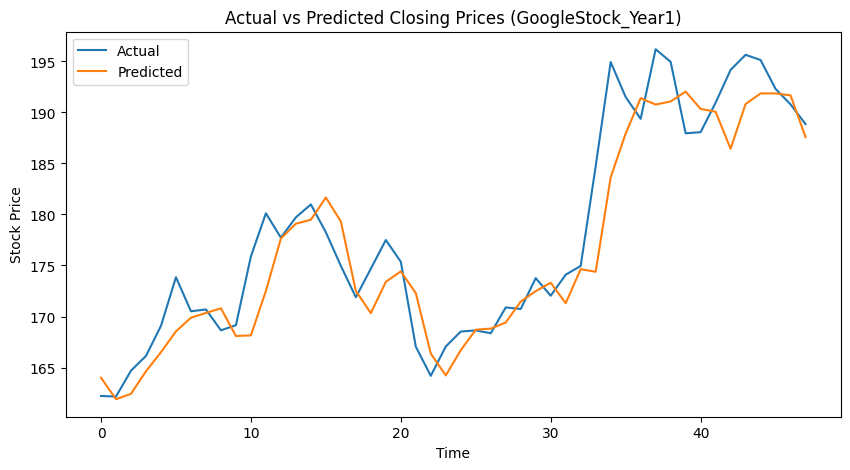

XGBoost Model Performance (GoogleStock_Year1):
Mean Squared Error = 14.85
Root Mean Squared Error = 3.85
R2 Score = 0.86


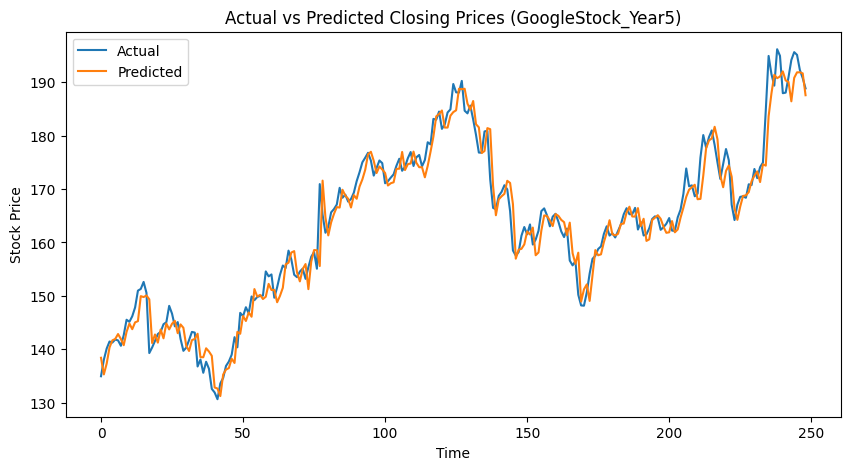

XGBoost Model Performance (GoogleStock_Year5):
Mean Squared Error = 9.83
Root Mean Squared Error = 3.14
R2 Score = 0.96


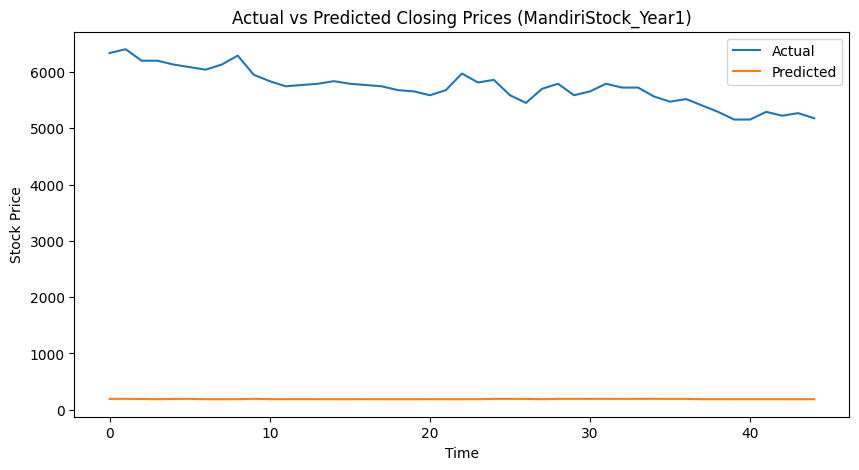

XGBoost Model Performance (MandiriStock_Year1):
Mean Squared Error = 30806044.55
Root Mean Squared Error = 5550.32
R2 Score = -305.74


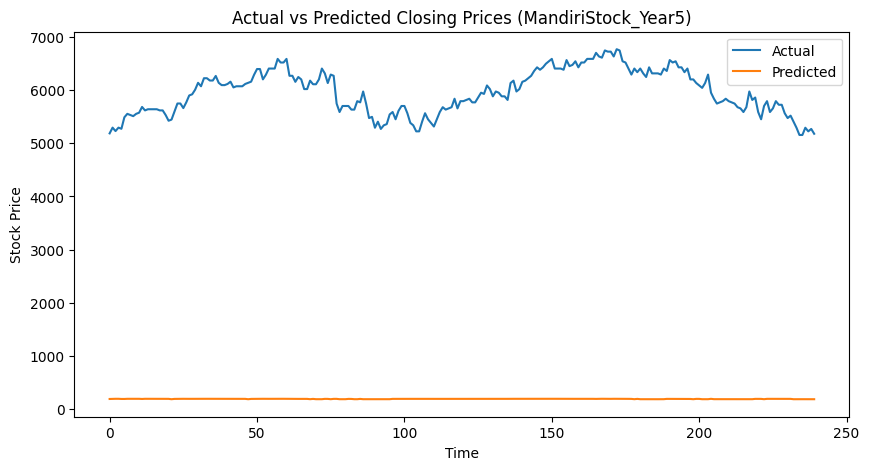

XGBoost Model Performance (MandiriStock_Year5):
Mean Squared Error = 33474052.86
Root Mean Squared Error = 5785.68
R2 Score = -197.04


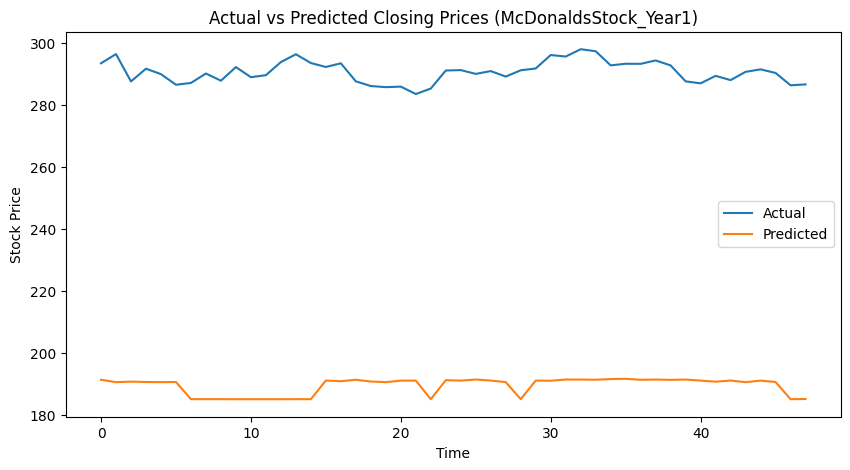

XGBoost Model Performance (McDonaldsStock_Year1):
Mean Squared Error = 10263.47
Root Mean Squared Error = 101.31
R2 Score = -856.83


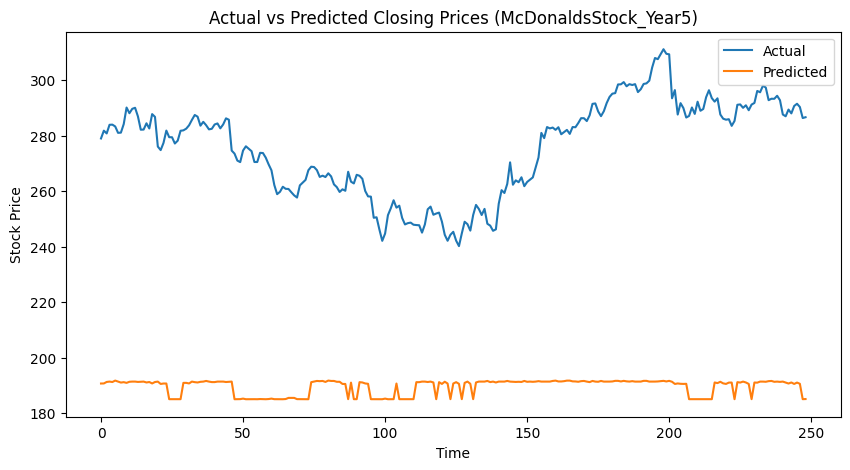

XGBoost Model Performance (McDonaldsStock_Year5):
Mean Squared Error = 7668.85
Root Mean Squared Error = 87.57
R2 Score = -25.26


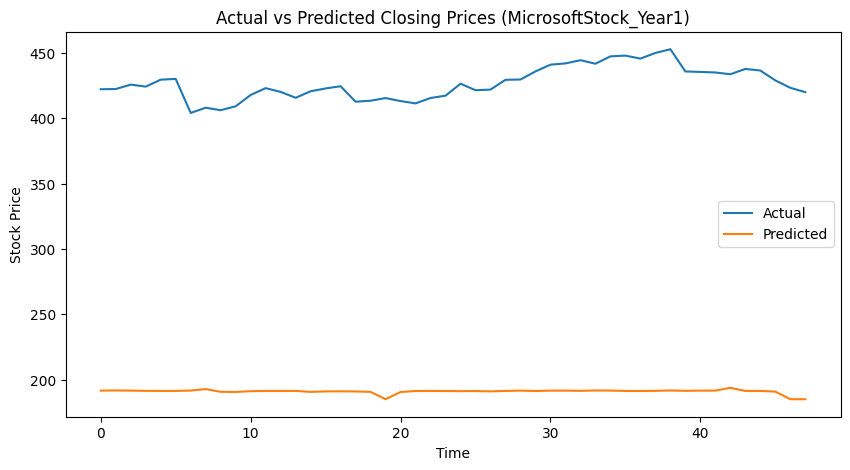

XGBoost Model Performance (MicrosoftStock_Year1):
Mean Squared Error = 55733.39
Root Mean Squared Error = 236.08
R2 Score = -368.49


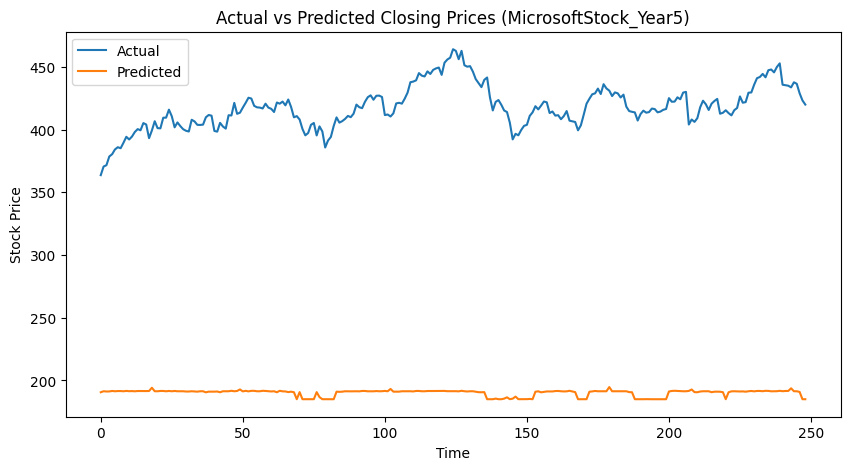

XGBoost Model Performance (MicrosoftStock_Year5):
Mean Squared Error = 52076.08
Root Mean Squared Error = 228.20
R2 Score = -173.96


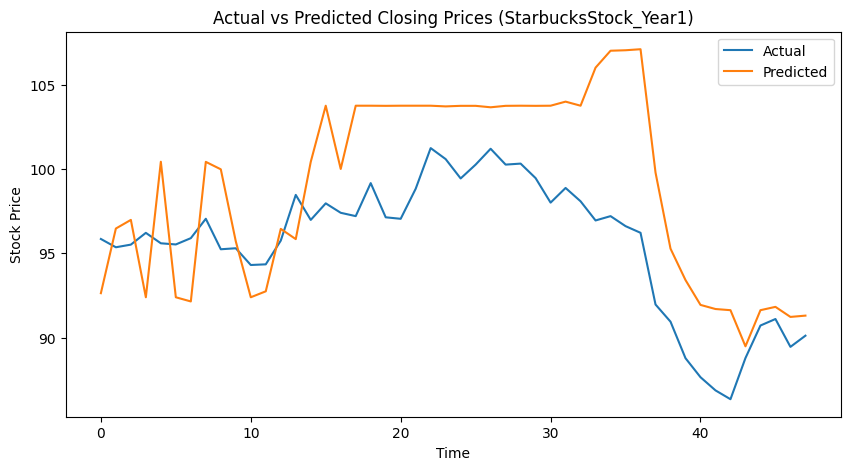

XGBoost Model Performance (StarbucksStock_Year1):
Mean Squared Error = 23.31
Root Mean Squared Error = 4.83
R2 Score = -0.53


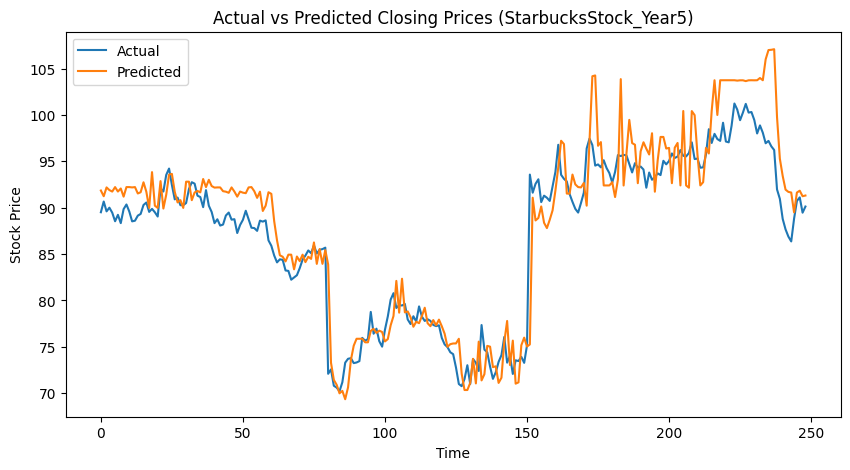

XGBoost Model Performance (StarbucksStock_Year5):
Mean Squared Error = 11.72
Root Mean Squared Error = 3.42
R2 Score = 0.84


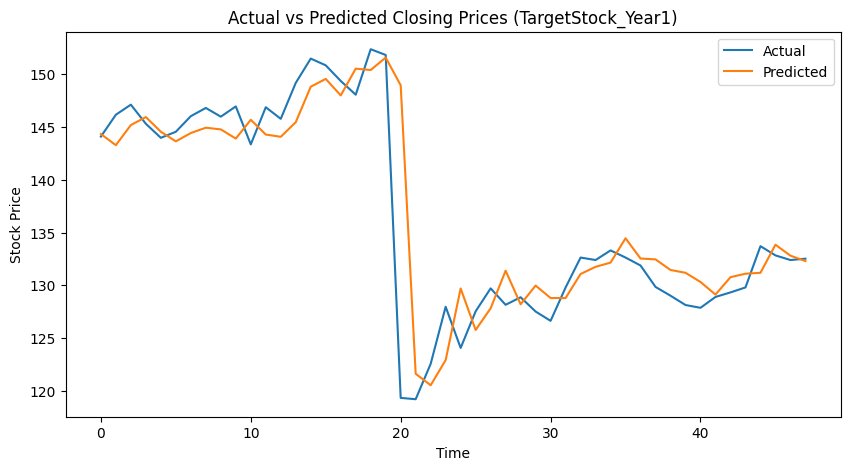

XGBoost Model Performance (TargetStock_Year1):
Mean Squared Error = 22.96
Root Mean Squared Error = 4.79
R2 Score = 0.76


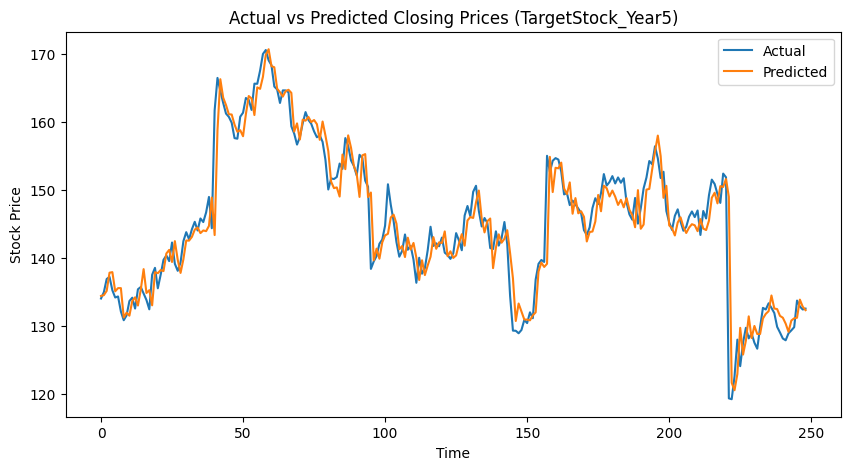

XGBoost Model Performance (TargetStock_Year5):
Mean Squared Error = 12.44
Root Mean Squared Error = 3.53
R2 Score = 0.89

Final Error Summary:
Average Mean Squared Error = 15532059.32
Average Root Mean Squared Error = 2187.53
Average R2 Score = -242.55


In [55]:
n = len(dataset)
mse_sum = 0
rmse_sum = 0
r2_sum = 0

for name, data in dataset.items():
    features = dataset[name][feature2]
    stock_target = dataset[name]['Target']

    x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

    xgboost_predictions = xgboost_model.predict(x_test_xgb)

    draw_plot(y_test_xgb, xgboost_predictions, name)

    mse = mean_squared_error(y_test_xgb, xgboost_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_xgb, xgboost_predictions)

    mse_sum += mse
    rmse_sum += rmse
    r2_sum += r2

    print(f"XGBoost Model Performance ({name}):")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Root Mean Squared Error = {rmse:.2f}")
    print(f"R2 Score = {r2:.2f}")

print()
print("Final Error Summary:")
print(f"Average Mean Squared Error = {mse_sum / n:.2f}")
print(f"Average Root Mean Squared Error = {rmse_sum / n:.2f}")
print(f"Average R2 Score = {r2_sum / n:.2f}")

From a slight seeing of the result of testing the model with other datasets, it might actually have done worst than random forest. Surprising.

# LSTM (Long Short Term Memory) Model

Going a bit more deep learning, although technically the traditional linear regression model is doing well on its own, couldn't hurt to try delving a bit deeper. This is probably going to be the final model to test since I am running out of time as well.

## Training with 1 year data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

stock_target = dataset['AppleStock_Year1']['Target']
model_features = dataset['AppleStock_Year1'][['Close']]

feature_scaler = MinMaxScaler(feature_range=(0,1))
scaled_features = feature_scaler.fit_transform(model_features)

x = []
y = []
window_size = 30

for i in range(window_size, len(scaled_features)):
    x.append(scaled_features[i-window_size:i, 0])
    y.append(scaled_features[i,0])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1)) 

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

lstm_model = Sequential()
lstm_model.add(LSTM(units=100, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, epochs=200, batch_size=16)

lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = feature_scaler.inverse_transform(lstm_predictions)
y_test_actual = feature_scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/200


/home/g30tr1x/miniforge3/envs/MLPythonLow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0727
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0084
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070
Epoch 15/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065
Epoch 16/200

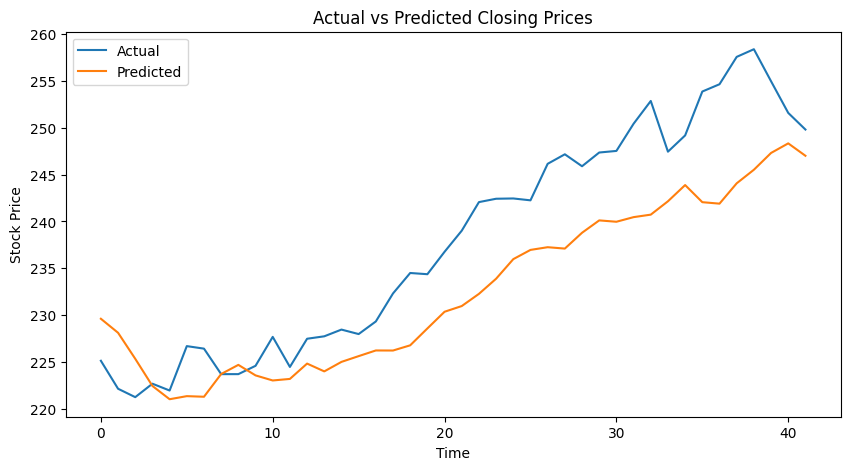

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [ ]:
predicted_direction = np.sign(lstm_predictions[1:] - lstm_predictions[:-1])
actual_direction = np.sign(y_test_actual[1:] - y_test_actual[:-1])

mse = mean_squared_error(y_test_actual, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, lstm_predictions)
directional_accuracy = np.mean(predicted_direction == actual_direction) * 100

print("LSTM Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

LSTM Model Performance:
Mean Squared Error = 48.79
Root Mean Squared Error = 6.99
R2 Score = 0.65


Initial results aren't bad. It definitelly did better than the random forest and XGBoost model. This could be quite a promising model. Since LSTM can technically "remember" past data in a way, it should also in theory be better than the linear regression model. Though I wonder how far I can make this work before I really run out of time and have to make the paper.

## Training with 5 year data

In [93]:
stock_target = dataset['AppleStock_Year5']['Target']
model_features = dataset['AppleStock_Year5'][['Close']]

feature_scaler = MinMaxScaler(feature_range=(0,1))
scaled_features = feature_scaler.fit_transform(model_features)

x = []
y = []
window_size = 30

for i in range(window_size, len(scaled_features)):
    x.append(scaled_features[i-window_size:i, 0])
    y.append(scaled_features[i,0])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1)) 

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

lstm_model = Sequential()
lstm_model.add(LSTM(units=100, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, epochs=200, batch_size=16)

lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = feature_scaler.inverse_transform(lstm_predictions)
y_test_actual = feature_scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/200


/home/g30tr1x/miniforge3/envs/MLPythonLow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0530
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 9/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 10/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 11/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 12/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 13/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 14/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014
Epoch 15/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 16/200
61

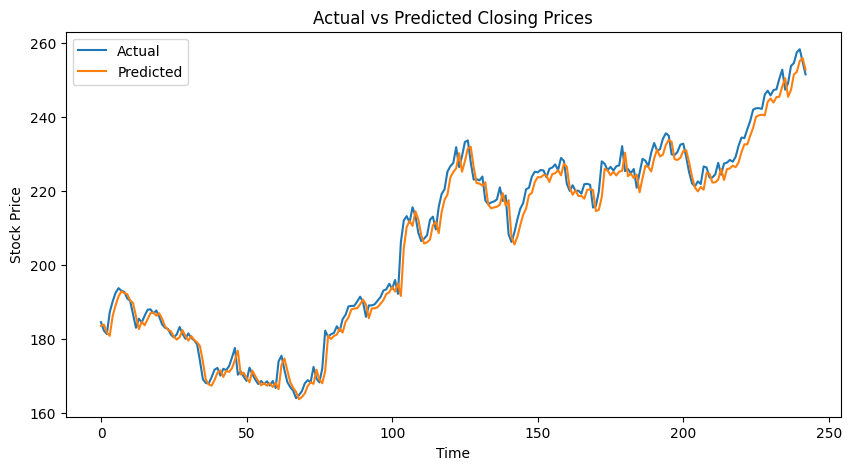

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [95]:
predicted_direction = np.sign(lstm_predictions[1:] - lstm_predictions[:-1])
actual_direction = np.sign(y_test_actual[1:] - y_test_actual[:-1])

mse = mean_squared_error(y_test_actual, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, lstm_predictions)
directional_accuracy = np.mean(predicted_direction == actual_direction) * 100

print("LSTM Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

LSTM Model Performance:
Mean Squared Error = 10.52
Root Mean Squared Error = 3.24
R2 Score = 0.98
Directional Accuracy: 53.72%


The model is doing fairly well at the moment, possibly as well as the linear regression model. I'll see if there are other things I can tweak to make this model perform more better. Although this is still using training data and with a single dataset.

## Testing with other datasets

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


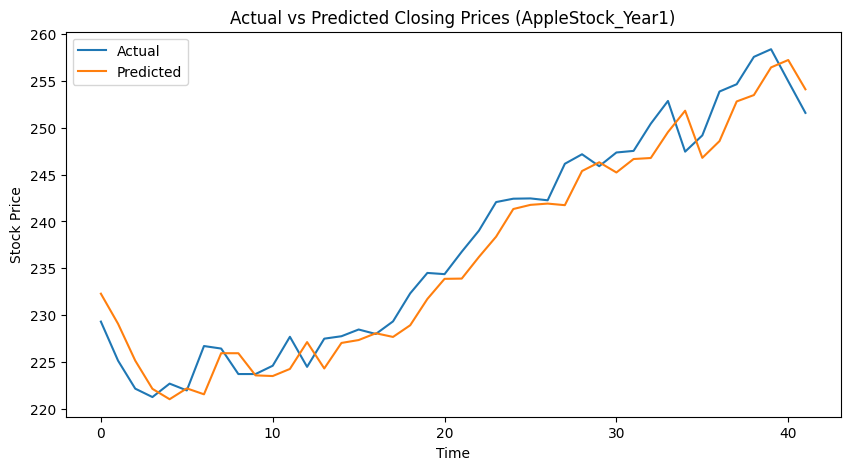

LSTM Model Performance (AppleStock_Year1):
Mean Squared Error = 7.04
Root Mean Squared Error = 2.65
R2 Score = 0.95
Directional Accuracy: 56.10%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


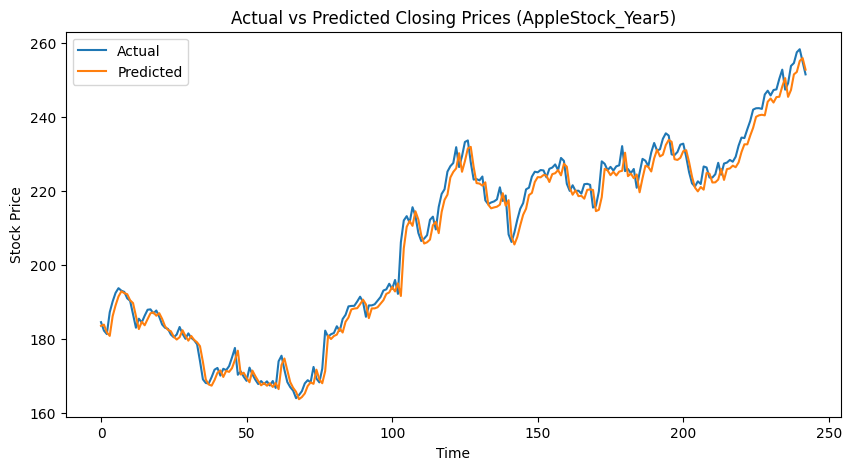

LSTM Model Performance (AppleStock_Year5):
Mean Squared Error = 10.52
Root Mean Squared Error = 3.24
R2 Score = 0.98
Directional Accuracy: 53.72%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


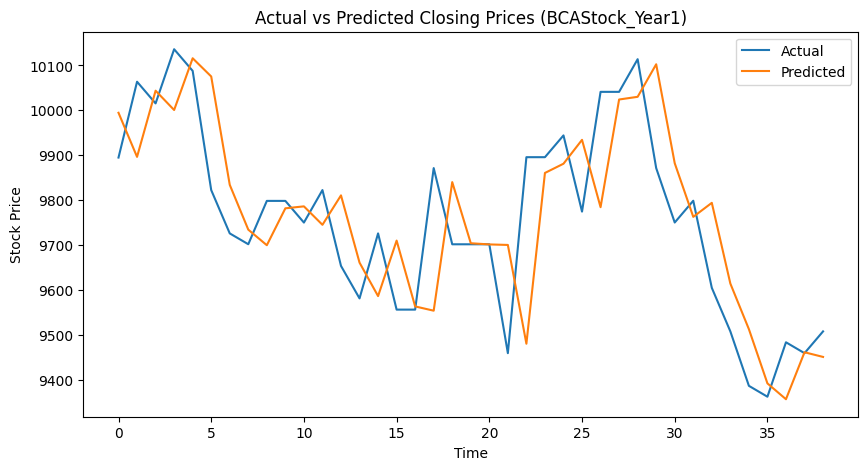

LSTM Model Performance (BCAStock_Year1):
Mean Squared Error = 21455.53
Root Mean Squared Error = 146.48
R2 Score = 0.50
Directional Accuracy: 28.95%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


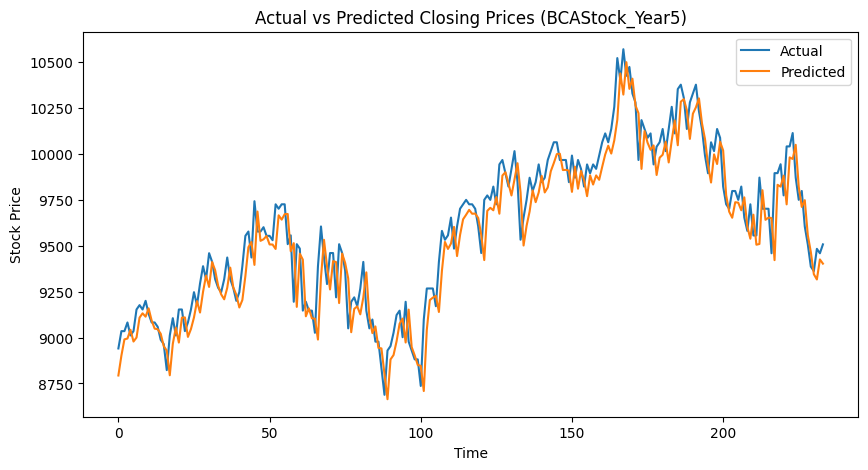

LSTM Model Performance (BCAStock_Year5):
Mean Squared Error = 20118.41
Root Mean Squared Error = 141.84
R2 Score = 0.88
Directional Accuracy: 39.48%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


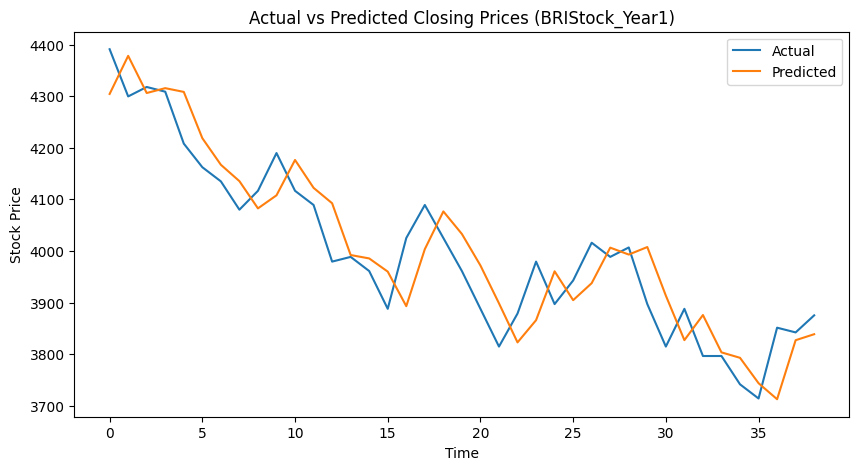

LSTM Model Performance (BRIStock_Year1):
Mean Squared Error = 4961.25
Root Mean Squared Error = 70.44
R2 Score = 0.82
Directional Accuracy: 50.00%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


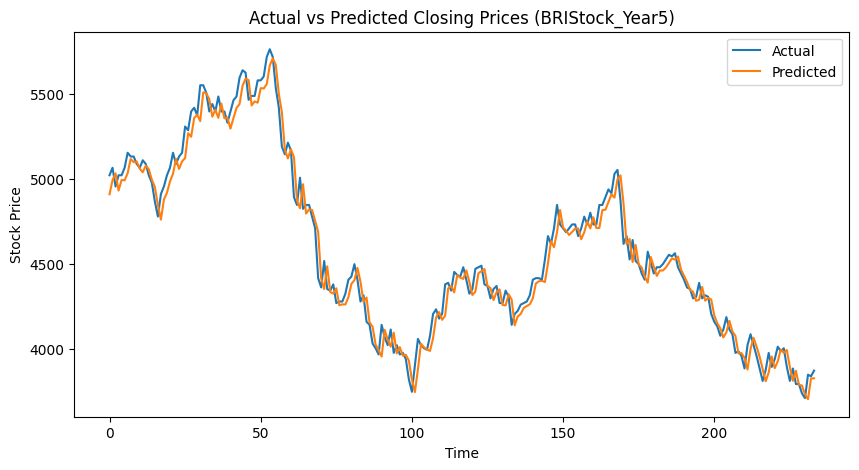

LSTM Model Performance (BRIStock_Year5):
Mean Squared Error = 7204.55
Root Mean Squared Error = 84.88
R2 Score = 0.97
Directional Accuracy: 46.78%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


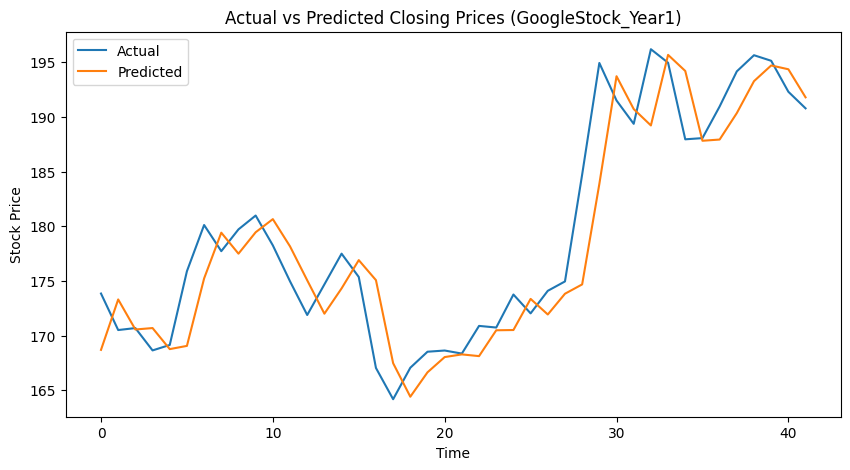

LSTM Model Performance (GoogleStock_Year1):
Mean Squared Error = 15.01
Root Mean Squared Error = 3.87
R2 Score = 0.84
Directional Accuracy: 51.22%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


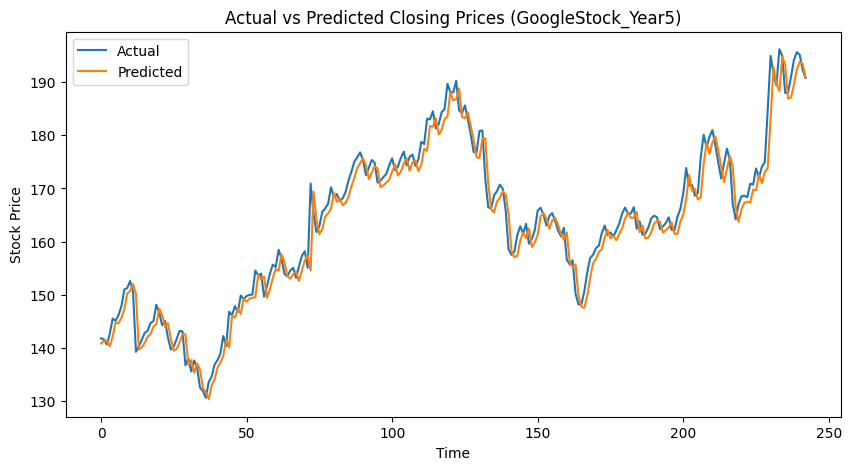

LSTM Model Performance (GoogleStock_Year5):
Mean Squared Error = 9.54
Root Mean Squared Error = 3.09
R2 Score = 0.96
Directional Accuracy: 52.48%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


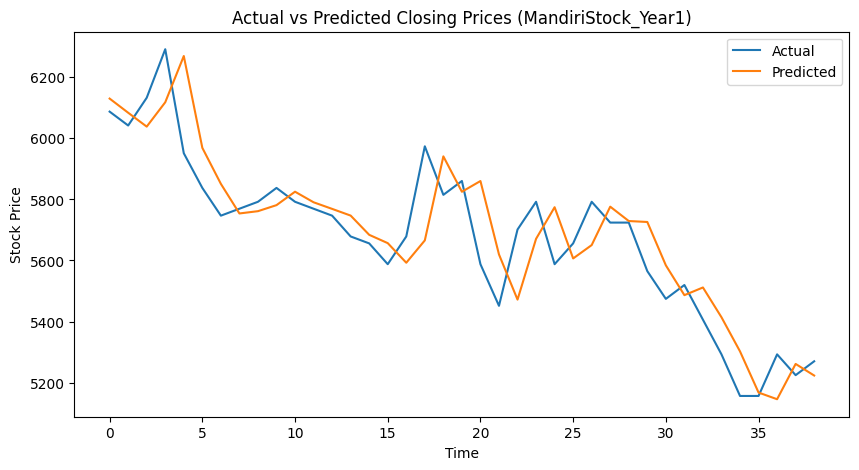

LSTM Model Performance (MandiriStock_Year1):
Mean Squared Error = 16664.88
Root Mean Squared Error = 129.09
R2 Score = 0.76
Directional Accuracy: 50.00%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


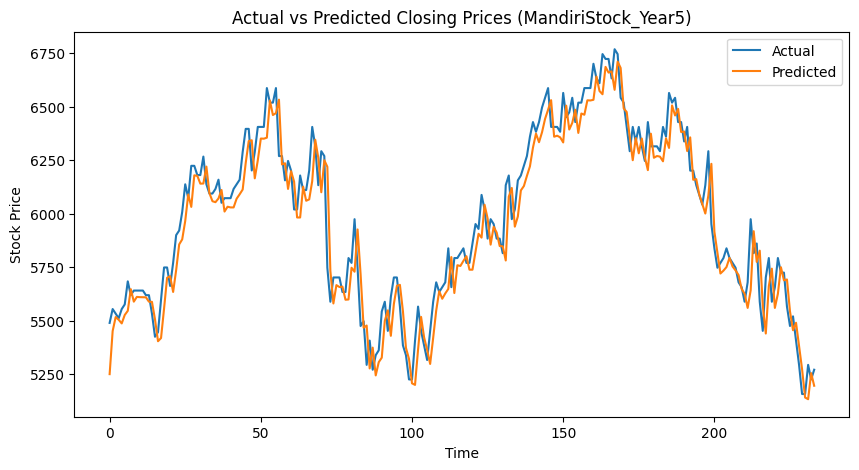

LSTM Model Performance (MandiriStock_Year5):
Mean Squared Error = 14352.07
Root Mean Squared Error = 119.80
R2 Score = 0.91
Directional Accuracy: 39.06%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


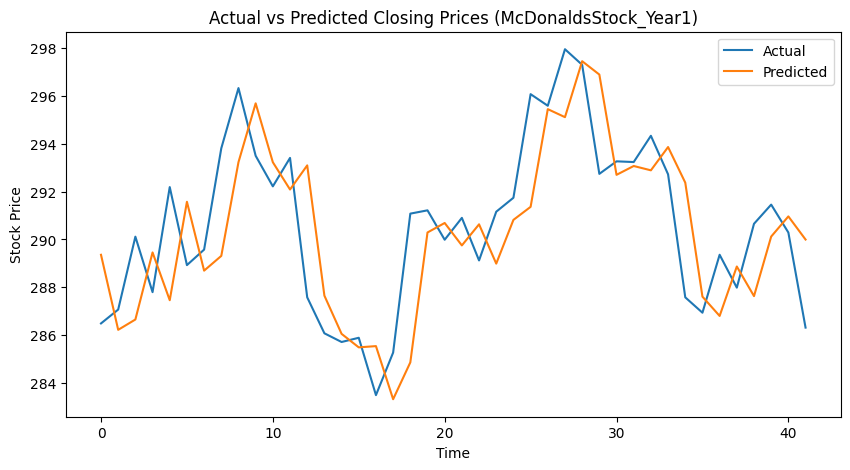

LSTM Model Performance (McDonaldsStock_Year1):
Mean Squared Error = 6.87
Root Mean Squared Error = 2.62
R2 Score = 0.43
Directional Accuracy: 36.59%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


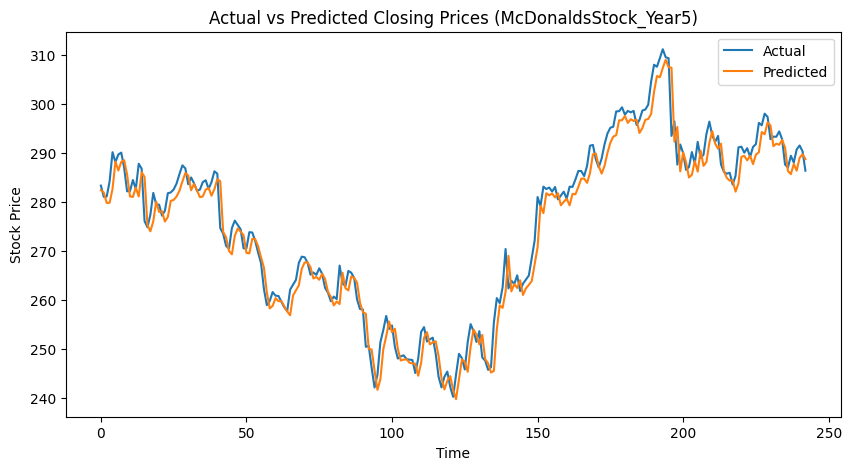

LSTM Model Performance (McDonaldsStock_Year5):
Mean Squared Error = 11.39
Root Mean Squared Error = 3.38
R2 Score = 0.96
Directional Accuracy: 48.35%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


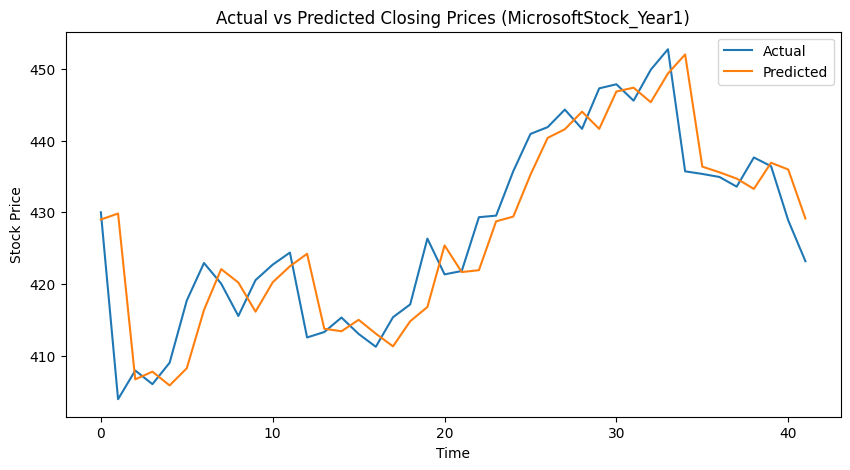

LSTM Model Performance (MicrosoftStock_Year1):
Mean Squared Error = 41.18
Root Mean Squared Error = 6.42
R2 Score = 0.76
Directional Accuracy: 51.22%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


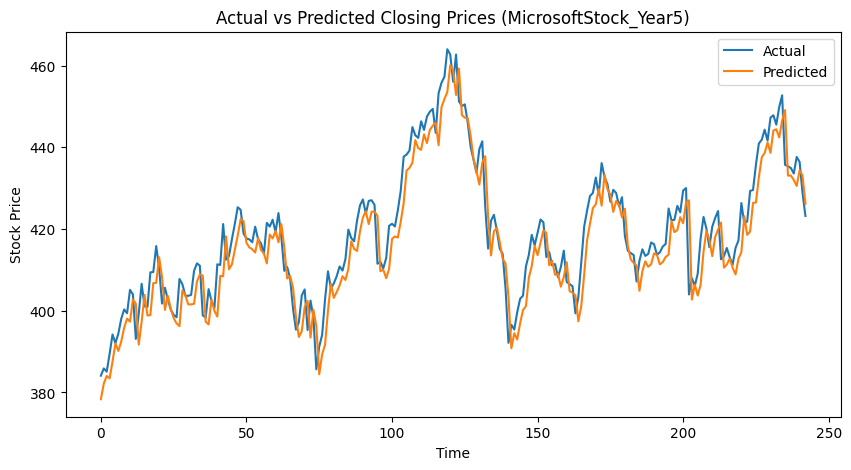

LSTM Model Performance (MicrosoftStock_Year5):
Mean Squared Error = 34.97
Root Mean Squared Error = 5.91
R2 Score = 0.87
Directional Accuracy: 52.48%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


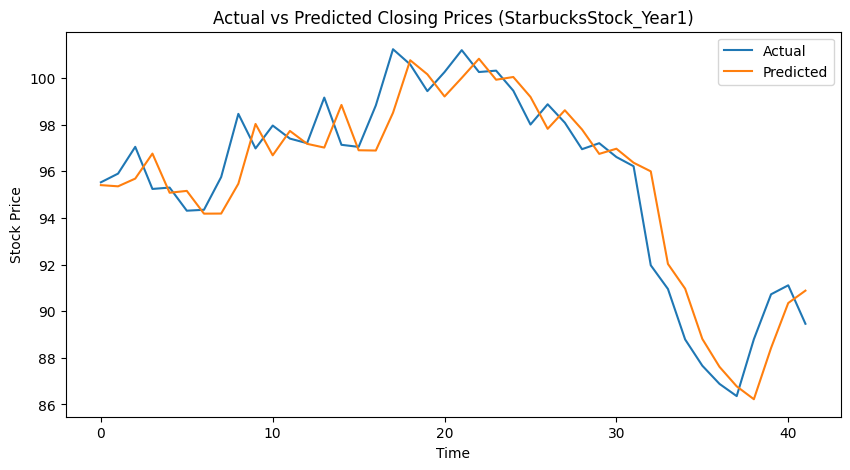

LSTM Model Performance (StarbucksStock_Year1):
Mean Squared Error = 2.02
Root Mean Squared Error = 1.42
R2 Score = 0.88
Directional Accuracy: 46.34%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


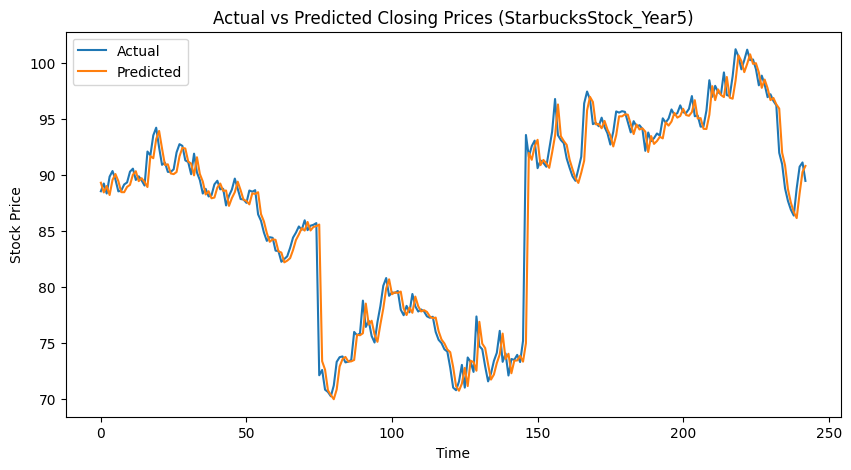

LSTM Model Performance (StarbucksStock_Year5):
Mean Squared Error = 3.74
Root Mean Squared Error = 1.93
R2 Score = 0.95
Directional Accuracy: 45.87%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


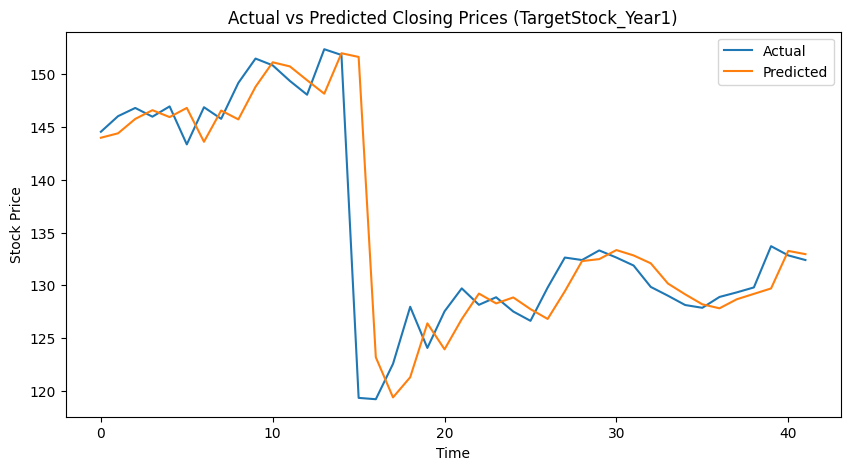

LSTM Model Performance (TargetStock_Year1):
Mean Squared Error = 30.08
Root Mean Squared Error = 5.48
R2 Score = 0.69
Directional Accuracy: 51.22%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


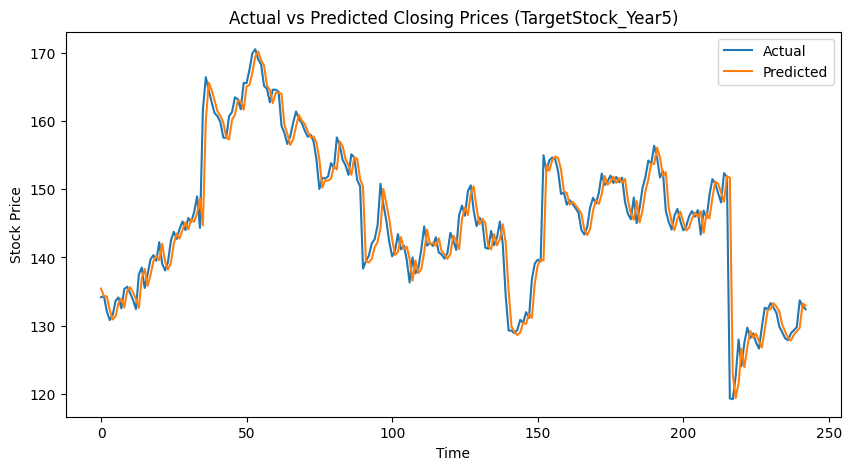

LSTM Model Performance (TargetStock_Year5):
Mean Squared Error = 12.10
Root Mean Squared Error = 3.48
R2 Score = 0.89
Directional Accuracy: 49.59%

Final Error Summary:
Average Mean Squared Error = 4718.95
Average Root Mean Squared Error = 40.89
Average R2 Score = 0.83
Average Directional Accuracy: 47.19%


In [96]:
n = len(dataset)
mse_sum = 0
rmse_sum = 0
r2_sum = 0
directional_accuracy_sum = 0

for name, data in dataset.items():
    stock_target = dataset[name]['Target']
    model_features = dataset[name][['Close']]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(model_features)

    x = []
    y = []
    window_size = 30

    for i in range(window_size, len(scaled_features)):
        x.append(scaled_features[i-window_size:i,0])
        y.append(scaled_features[i,0])

    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1)) 

    split = int(0.8 * len(x))
    x_train, x_test = x[:split], x[split:]
    y_train, y_test = y[:split], y[split:]

    lstm_predictions = lstm_model.predict(x_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual, label='Actual')
    plt.plot(lstm_predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title(f"Actual vs Predicted Closing Prices ({name})")
    plt.show()

    predicted_direction = np.sign(lstm_predictions[1:] - lstm_predictions[:-1])
    actual_direction = np.sign(y_test_actual[1:] - y_test_actual[:-1])

    mse = mean_squared_error(y_test_actual, lstm_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_actual, lstm_predictions)
    directional_accuracy = np.mean(predicted_direction == actual_direction) * 100

    mse_sum += mse
    rmse_sum += rmse
    r2_sum += r2
    directional_accuracy_sum += directional_accuracy

    print(f"LSTM Model Performance ({name}):")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Root Mean Squared Error = {rmse:.2f}")
    print(f"R2 Score = {r2:.2f}")
    print(f"Directional Accuracy: {directional_accuracy:.2f}%")

print()
print("Final Error Summary:")
print(f"Average Mean Squared Error = {mse_sum / n:.2f}")
print(f"Average Root Mean Squared Error = {rmse_sum / n:.2f}")
print(f"Average R2 Score = {r2_sum / n:.2f}")
print(f"Average Directional Accuracy: {directional_accuracy_sum / n:.2f}%")

## Conclusion

The model performs not bad really. It seems quite on par with the linear regression model. Although we can't say which is better for now, the final model will probably be either the LSTM Model or the Linear Regression Model